# 2. Model Building and Evaluation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/datasci281_final_project (github)'

/content/drive/MyDrive/MIDS/DATASCI 281 Summer 2025/datasci281_final_project (github)


### 0. Imports

In [3]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import cv2 as cv
from utils import *
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost
import joblib

### 1. Load in Processed Images

In [4]:
cwd = os.getcwd()
os.listdir(cwd)

['README.md',
 '.git',
 'data',
 '__pycache__',
 'standardized_data',
 'data_processed',
 '0. preprocessing_and_eda.ipynb',
 '1. feature_exploration.ipynb',
 'X_train_doh_features.npy',
 'X_train_dog_features.npy',
 'Y_raw_train.npy',
 'complex_feat_testing.joblib',
 'Y_train.npy',
 'X_test_dog.npy',
 'X_train_pca_canny_features.npy',
 'X_test_doh.npy',
 'complex_feat_training.joblib',
 'y_test.npy',
 'y_raw_test.npy',
 'utils_1.py',
 'X_test_canny.npy',
 'logistic_model_dog.joblib',
 'logistic_model_complex.joblib',
 'logistic_model_canny.joblib',
 'rf_model_doh.joblib',
 'rf_model_dog.joblib',
 'logistic_model_doh.joblib',
 'rf_model_complex.joblib',
 'rf_model_canny.joblib',
 '2. model_building.ipynb',
 'utils.py',
 'lda_model_dog.joblib',
 'lda_model_doh.joblib',
 'lda_model_canny.joblib',
 'lda_model_complex.joblib',
 'lda_model_dog_doh.joblib',
 'lda_model_dog_canny.joblib',
 'lda_model_doh_complex.joblib',
 'qda_model_dog.joblib',
 'qda_model_doh.joblib',
 'qda_model_canny.jobli

In [5]:
data_path = os.path.join(cwd,'standardized_data/Training')

X = []
y = []

for label in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path,label)):
        image_path = os.path.join(data_path,label,image)
        load_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # flatten_image = load_image.flatten()
        X.append(load_image)
        y.append(label)


# Convert to Numpy Array
X = np.array(X)
y = np.array(y)
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

print(X.shape)
print(y.shape)

print(X[0])
print(y[0])

(5712, 512, 512)
(5712,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


### 2. Base Model (most common class classifier)

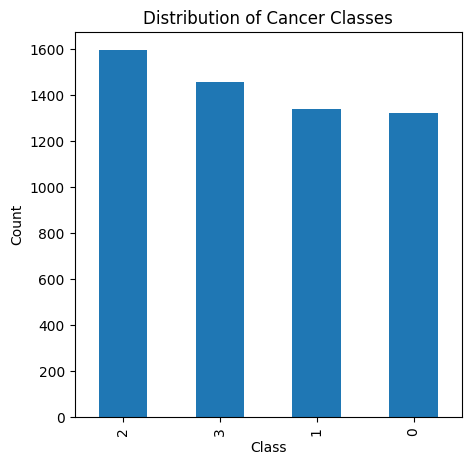

['glioma' 'meningioma' 'notumor' 'pituitary']


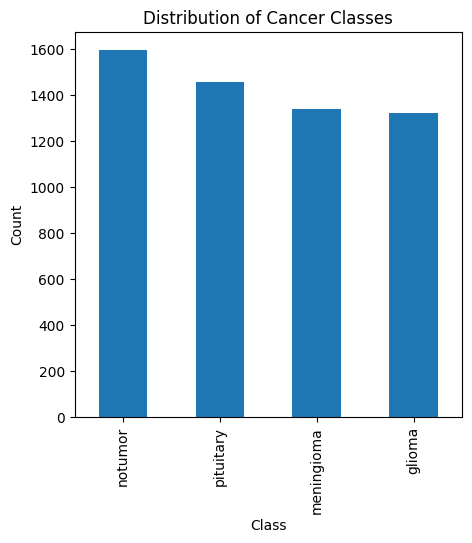

Most Common Label: 2
(5712,)
(5712,)


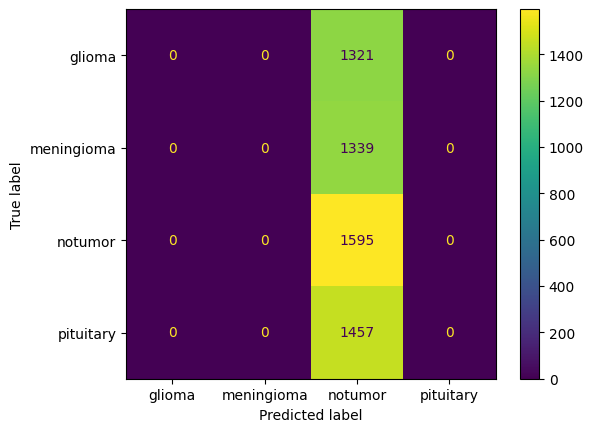

================== TRAINING METRICS ===================
Accuracy Score: 0.27923669467787116
Macro Precision: 0.06980917366946779
Macro Recall: 0.25
Macro F1: 0.10914191870808813
Micro Precision: 0.27923669467787116
Micro Recall: 0.27923669467787116
Micro F1: 0.27923669467787116


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
plt.figure(figsize=(5,5))
y_train_series = pd.Series(y)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(le.classes_)
y_transformed = le.inverse_transform(y)

plt.figure(figsize=(5,5))
y_train_series = pd.Series(y_transformed)
y_train_series.value_counts().plot(kind='bar')
plt.title('Distribution of Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Generate Model Statistics
most_common_label = stats.mode(y)[0]
print("Most Common Label: " + str(most_common_label))
y_predict = np.ones((y.shape)) * most_common_label
print(y_predict.shape)
print(y.shape)

# Generate Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y, y_predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y, y_predict)
macro_precision = metrics.precision_score(y,y_predict,average ='macro')
macro_recall = metrics.recall_score(y,y_predict,average='macro')
macro_f1 = metrics.f1_score(y,y_predict,average='macro')
micro_precision = metrics.precision_score(y,y_predict,average='micro')
micro_recall = metrics.recall_score(y,y_predict,average='micro')
micro_f1 = metrics.f1_score(y,y_predict,average='micro')

print("================== TRAINING METRICS ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

### 3. Extract Features (Canny Edges, Difference of Gaussians, Complex Feature)

In [7]:
# ### TBD
# X_dog_features = get_features(X, feat_name='blob_dog')
# X_doh_features = get_features(X, feat_name='blob_doh')
# X_canny_features = get_features(X, feat_name='canny')
# pca = PCA(n_components=1000, svd_solver="randomized", whiten=True).fit(X_canny_features)
# X_pca_canny_features = pca.transform(X_canny_features)
# # X_complex_features = get_features(X, feat_name='complex')

# np.save('X_train_dog_features.npy', X_dog_features)
# np.save('X_train_doh_features.npy', X_doh_features)
# np.save('X_train_pca_canny_features.npy', X_pca_canny_features)
# # np.save('X_train_complex_features.npy', X_complex_features)
# np.save('Y_train.npy',y)
# y_raw_train = le.inverse_transform(y)
# np.save('Y_raw_train.npy',y_raw_train)
# print(y.shape)
# print(y_raw_train.shape)

### 3a. Load Features

In [8]:
X_train_dog_features = np.load('X_train_dog_features.npy')
X_train_doh_features = np.load('X_train_doh_features.npy')
X_train_pca_canny_features = np.load('X_train_pca_canny_features.npy')
y_train = np.load('Y_train.npy')

In [9]:
bundle = get_features(None, "complex", joblib_path="complex_feat_training.joblib", return_bundle=True)
X_train_complex_features, y_train_complex_features = bundle.X, bundle.y

Loaded: X=(5712, 768), y=(5712,), paths=5712
Class counts: {'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}
Mismatches: 0
'glioma' indices sample: [0, 1, 2, 3, 4]


In [10]:
y_train

array([3, 3, 3, ..., 1, 1, 1])

In [11]:
y_train_complex_features

array([0, 0, 0, ..., 3, 3, 3])

### 3a. PCA Variance Vectors

In [12]:
# x = plot_PCA([X_dog_features, X_doh_features, X_canny_features, X_complex_features], n_components=[min(X_dog_features.shape), min(X_doh_features.shape), 1000, min(X_complex_features.shape)])


### 4. Shuffle Data

In [13]:
np.random.seed(281)

# Create a list of indexes that is the length of the number of training examples
indices = [i for i in range(0,X.shape[0])]
shuffle_indices = np.random.permutation(indices)

# Reorder X and Y based on the shuffled indices
# X = X[shuffle_indices]
# y = y[shuffle_indices]

X_dog_features = X_train_dog_features[shuffle_indices]
X_doh_features = X_train_doh_features[shuffle_indices]
X_canny_features = X_train_pca_canny_features[shuffle_indices]
X_complex_features = X_train_complex_features[shuffle_indices]

y_train = y_train[shuffle_indices]

In [14]:
print(X_dog_features.shape)
print(X_dog_features.shape)
print(X_canny_features.shape)
print(X_complex_features.shape)
print(y_train.shape)

(5712, 14)
(5712, 14)
(5712, 1000)
(5712, 768)
(5712,)


### 5. Model Training

In [15]:
features = {'dog':X_dog_features,
            'doh':X_doh_features,
            'canny':X_canny_features,
            'complex': X_complex_features}

In [16]:
all_results = pd.DataFrame(columns = ['feature', 'model_type', 'accuracy_score', 'macro_precision', 'macro_recall', 'macro_f1',
                                      'micro_precision', 'micro_recall', 'micro_f1', 'training_time'])

#### Logistic Regression

Fitting 5 folds for each of 4 candidates, totalling 20 fits


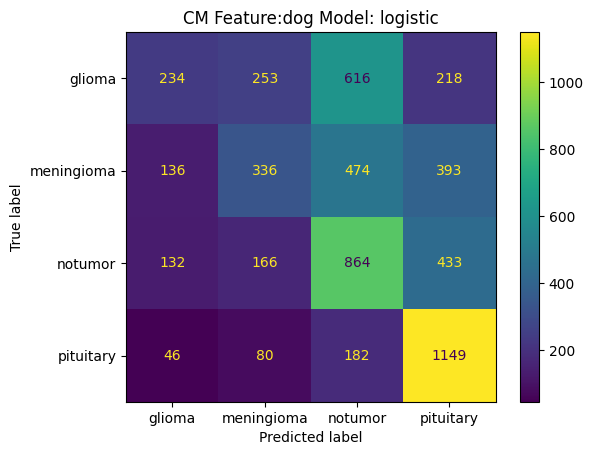

(5712, 4)


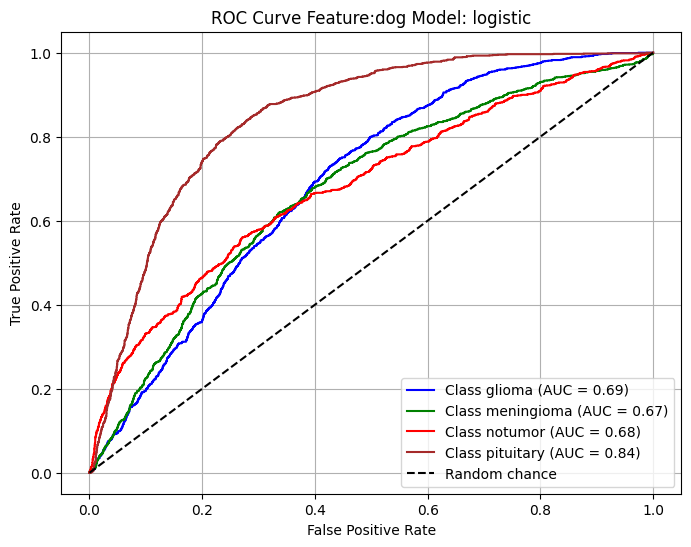

Fitting 5 folds for each of 4 candidates, totalling 20 fits


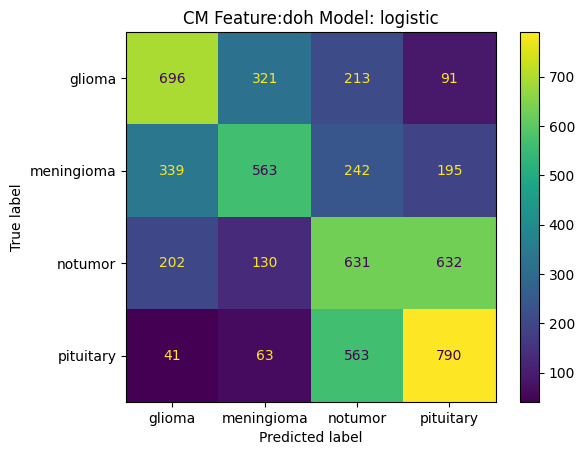

(5712, 4)


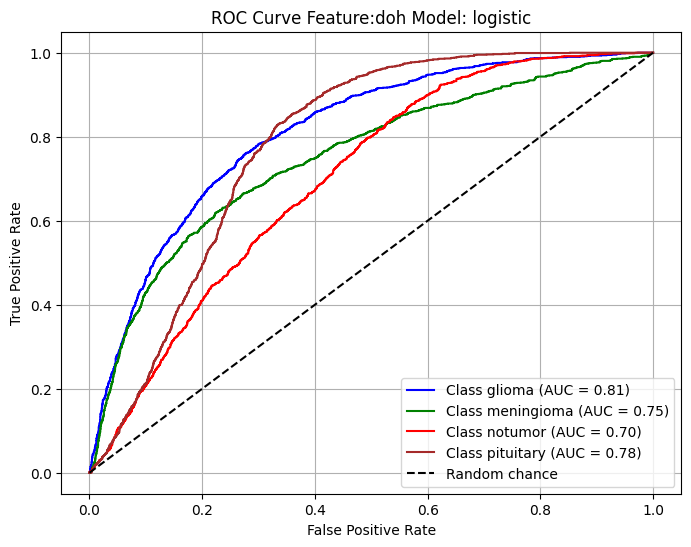

Fitting 5 folds for each of 4 candidates, totalling 20 fits


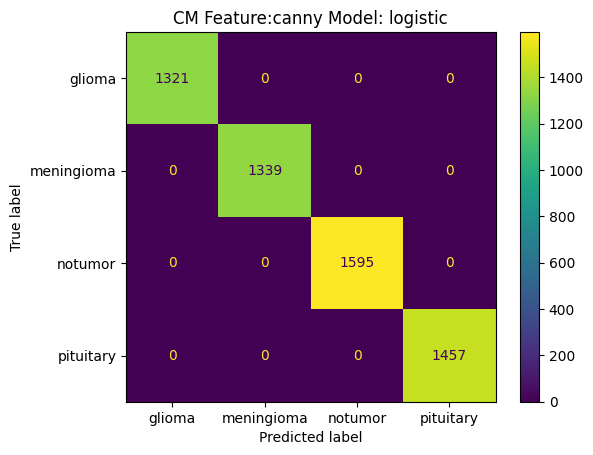

(5712, 4)


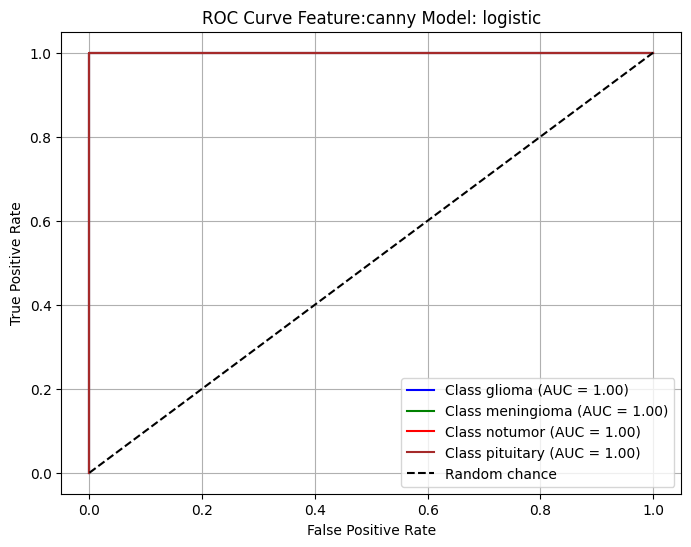

Fitting 5 folds for each of 4 candidates, totalling 20 fits


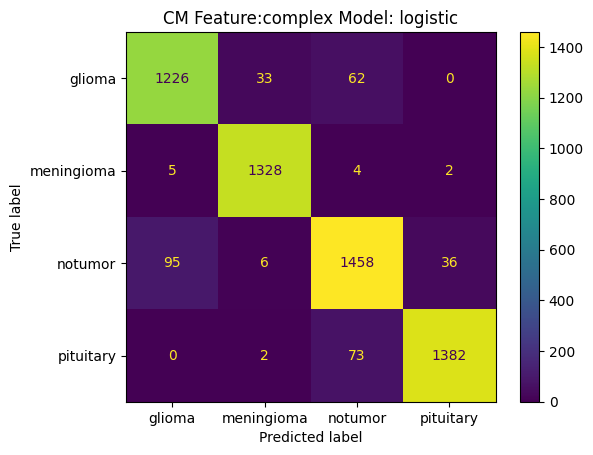

(5712, 4)


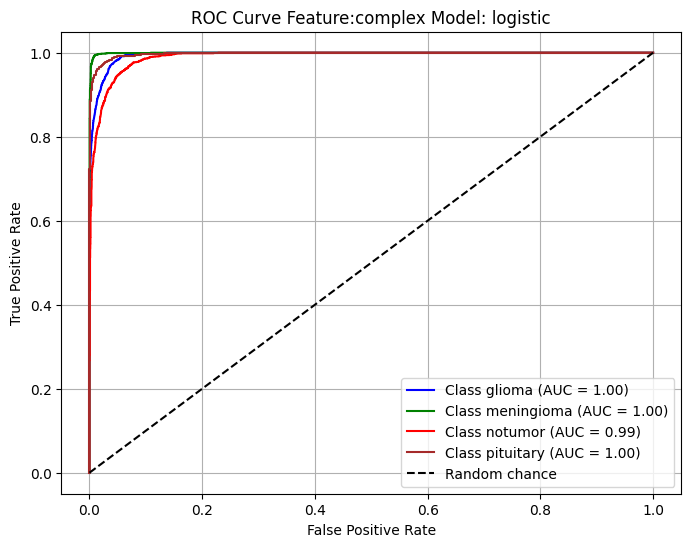

   feature model_type  accuracy_score  macro_precision  macro_recall  \
0      dog   logistic        0.452206         0.439459      0.439593   
1      doh   logistic        0.469188         0.478134      0.471289   
2    canny   logistic        1.000000         1.000000      1.000000   
3  complex   logistic        0.944328         0.945209      0.945625   

   macro_f1  micro_precision  micro_recall  micro_f1  training_time  
0  0.413061         0.452206      0.452206  0.452206       9.060948  
1  0.472472         0.469188      0.469188  0.469188      17.010220  
2  1.000000         1.000000      1.000000  1.000000      59.897223  
3  0.945347         0.944328      0.944328  0.944328     585.756774  


In [17]:
logistic_models = {}
for feature in features.keys():
    logistic_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='logistic', feature=feature)
    logistic_models[feature] = logistic_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [18]:
logistic_models

{'dog': LogisticRegression(max_iter=1000, solver='newton-cg'),
 'doh': LogisticRegression(max_iter=1000),
 'canny': LogisticRegression(max_iter=1000, solver='newton-cg'),
 'complex': LogisticRegression(max_iter=1000, solver='newton-cg')}

In [21]:
save_models(logistic_models, 'logistic_model')

saved model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=dog to path=logistic_model_dog.joblib
saved model=LogisticRegression(max_iter=1000) for feature=doh to path=logistic_model_doh.joblib
saved model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=canny to path=logistic_model_canny.joblib
saved model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=complex to path=logistic_model_complex.joblib


#### Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits


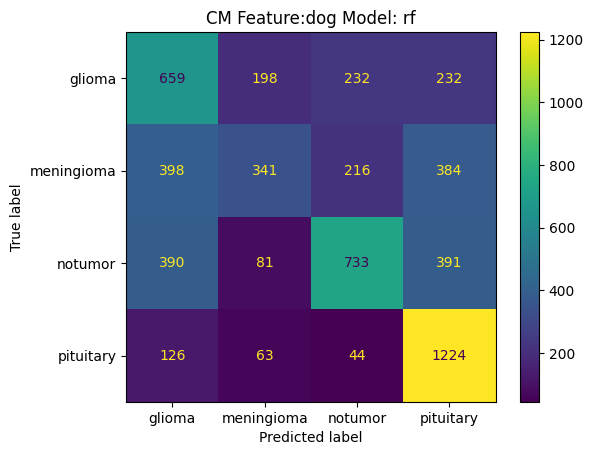

(5712, 4)


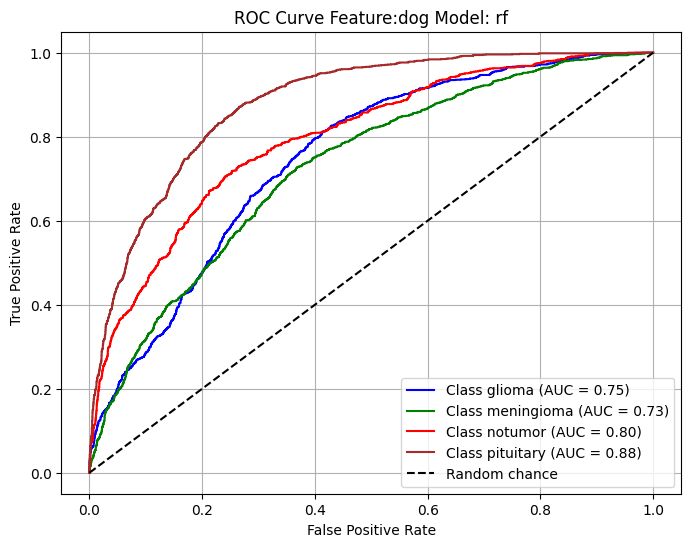

Fitting 5 folds for each of 24 candidates, totalling 120 fits


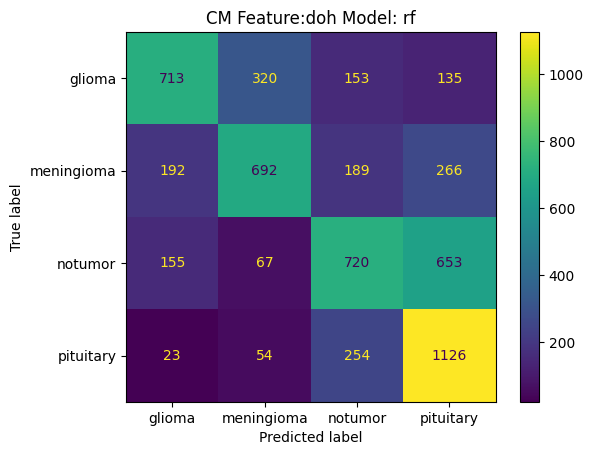

(5712, 4)


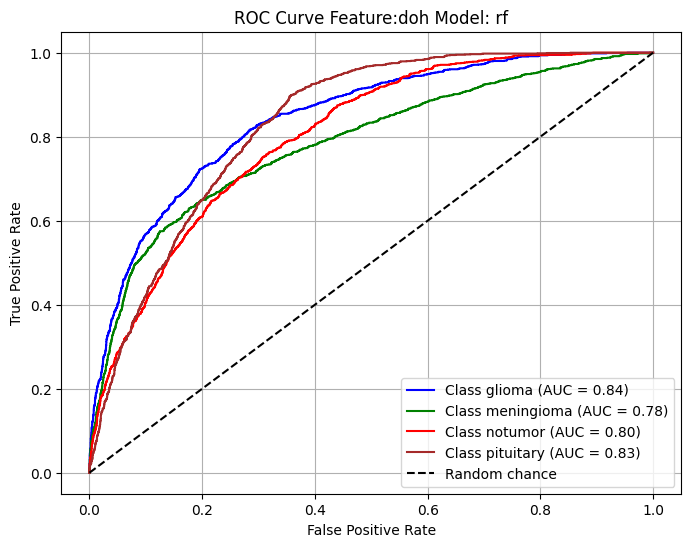

Fitting 5 folds for each of 24 candidates, totalling 120 fits


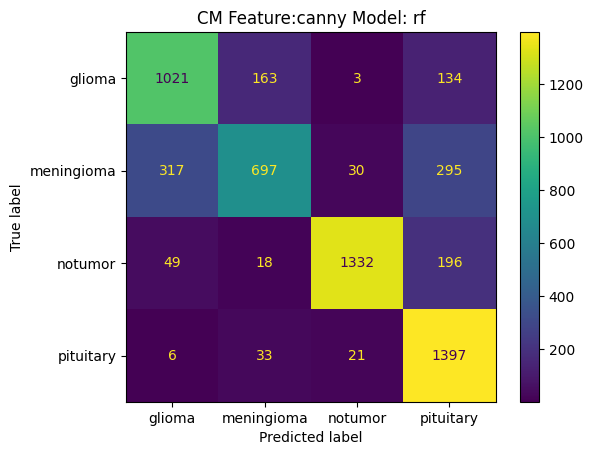

(5712, 4)


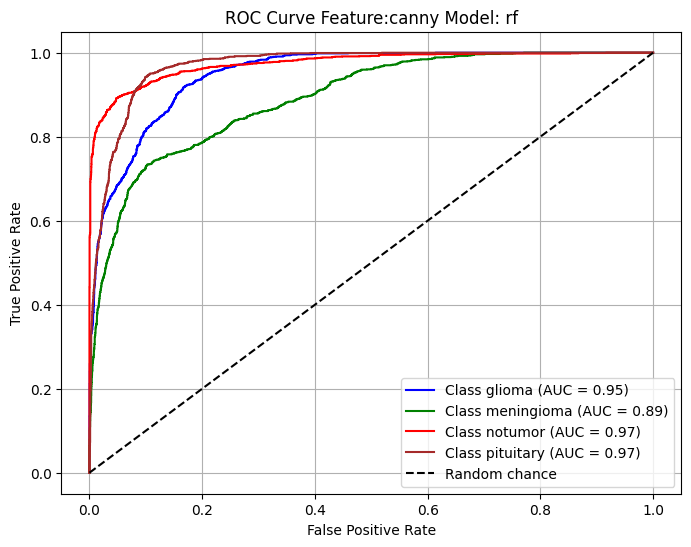

Fitting 5 folds for each of 24 candidates, totalling 120 fits


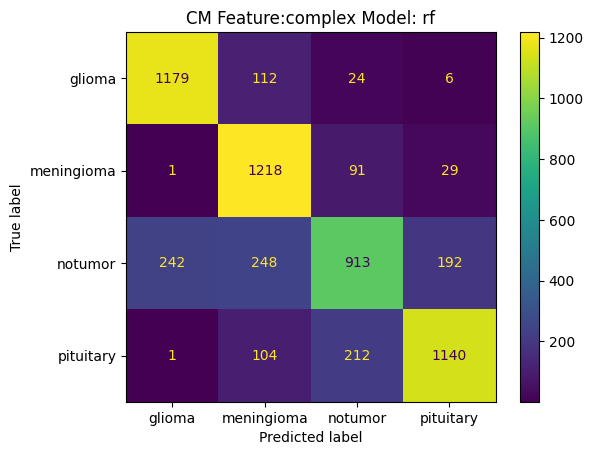

(5712, 4)


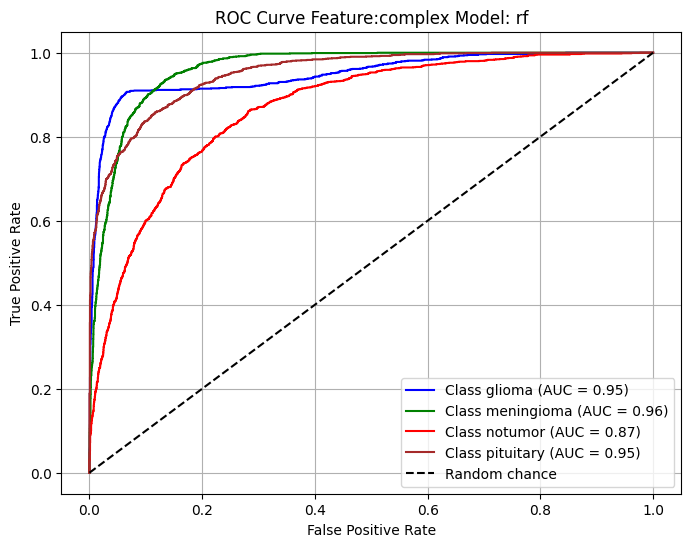

   feature model_type  accuracy_score  macro_precision  macro_recall  \
0      dog   logistic        0.452381         0.439704      0.439737   
1      doh   logistic        0.469188         0.478134      0.471289   
2    canny   logistic        0.999825         0.999813      0.999811   
3  complex   logistic        0.944328         0.945253      0.945643   
4      dog         rf        0.517682         0.516303      0.513294   
5      doh         rf        0.569153         0.583188      0.570194   
6    canny         rf        0.778536         0.787496      0.771842   
7  complex         rf        0.779062         0.780726      0.789246   

   macro_f1  micro_precision  micro_recall  micro_f1  training_time  
0  0.413099         0.452381      0.452381  0.452381       0.647819  
1  0.472472         0.469188      0.469188  0.469188       1.137290  
2  0.999812         0.999825      0.999825  0.999825       1.882597  
3  0.945377         0.944328      0.944328  0.944328      67.245301  
4

In [19]:
rf_models = {}
for feature in features.keys():
    rf_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='rf', feature=feature)
    rf_models[feature] = rf_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [21]:
rf_models

{'dog': RandomForestClassifier(max_depth=4, n_estimators=110),
 'doh': RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110),
 'canny': RandomForestClassifier(max_depth=4),
 'complex': RandomForestClassifier(max_depth=4, n_estimators=110)}

In [36]:
save_models(rf_models, 'rf_model')

saved model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=dog to path=rf_model_dog.joblib
saved model=RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110) for feature=doh to path=rf_model_doh.joblib
saved model=RandomForestClassifier(max_depth=4) for feature=canny to path=rf_model_canny.joblib
saved model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=complex to path=rf_model_complex.joblib


#### Linear Discriminant Analysis

In [17]:
features = {'dog':X_dog_features,
            'doh':X_doh_features,
            'canny':X_canny_features,
            'complex': X_complex_features,
            'dog_doh': np.concatenate((X_dog_features, X_doh_features), axis=1),
            'dog_canny': np.concatenate((X_dog_features, X_canny_features), axis=1),
            'doh_complex': np.concatenate((X_doh_features, X_complex_features), axis=1)
            }

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

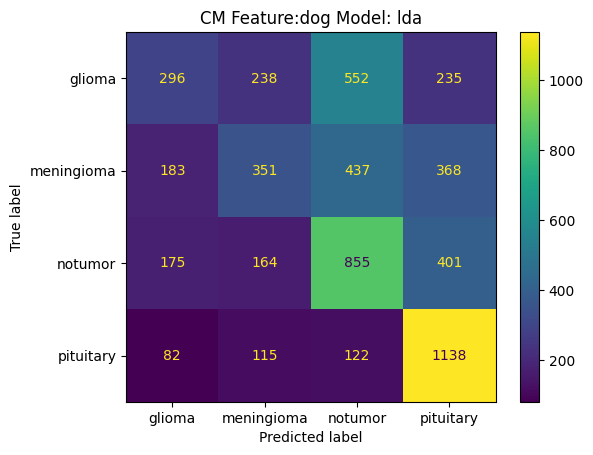

(5712, 4)


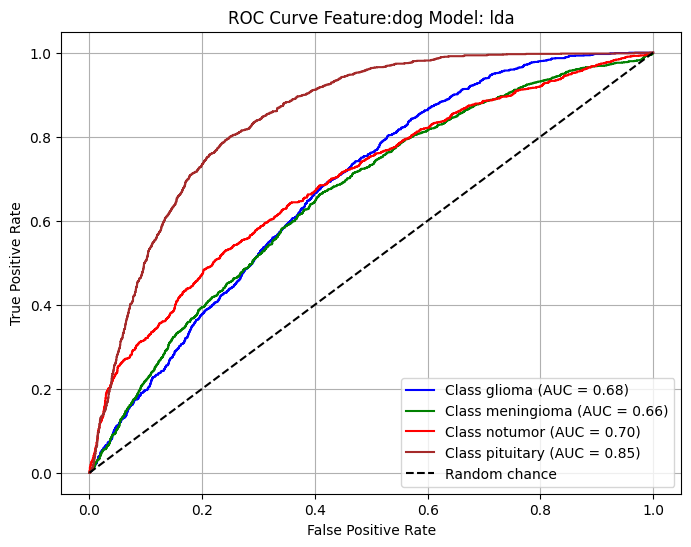

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

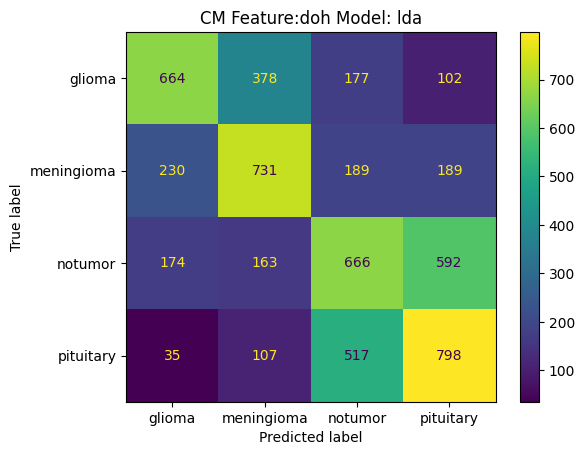

(5712, 4)


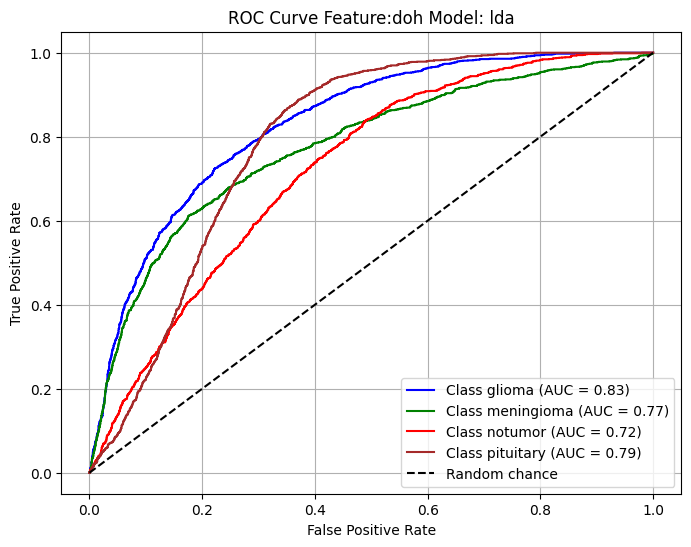

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

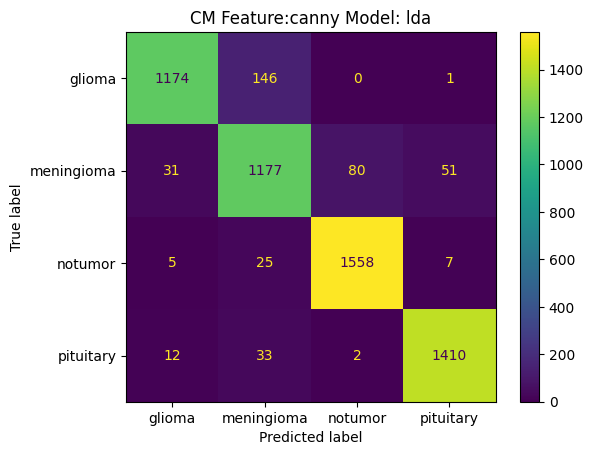

(5712, 4)


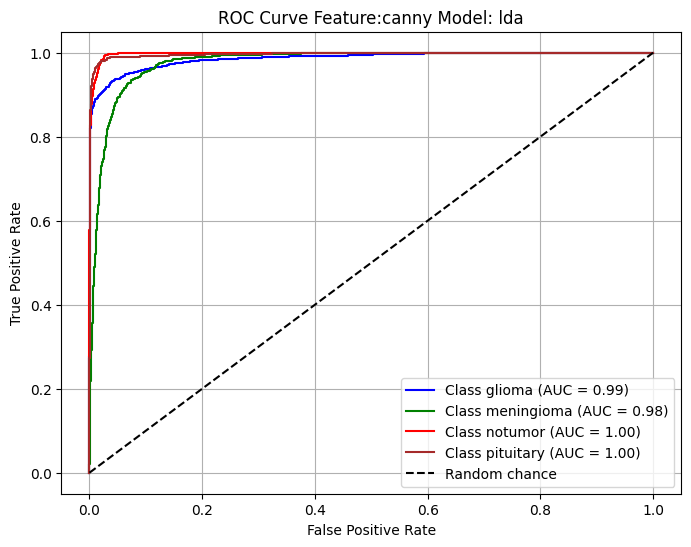

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

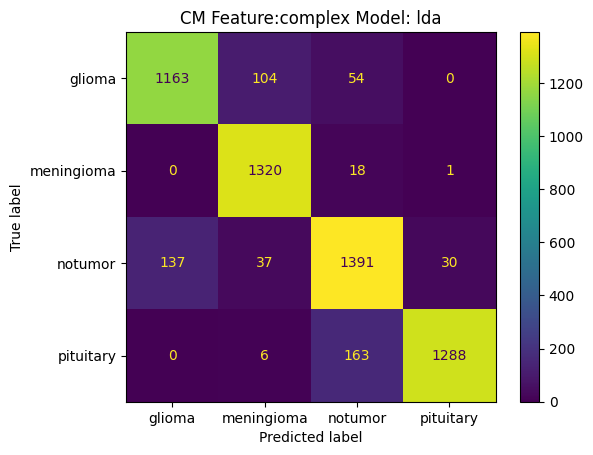

(5712, 4)


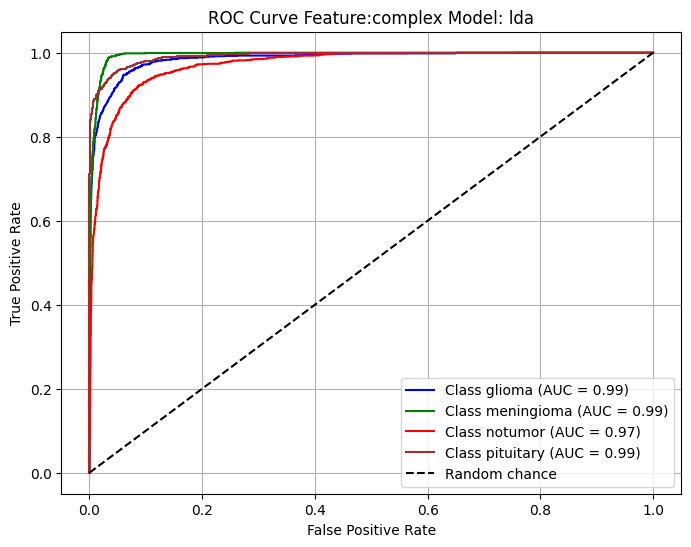

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

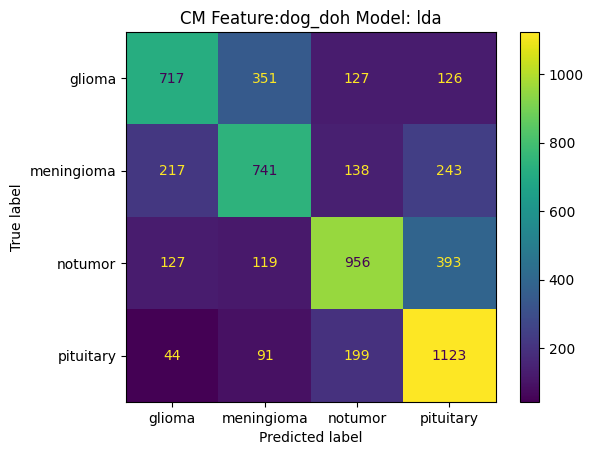

(5712, 4)


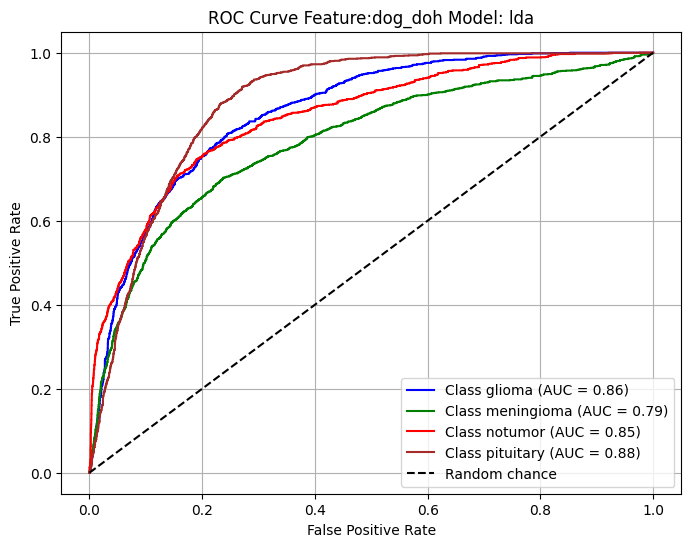

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

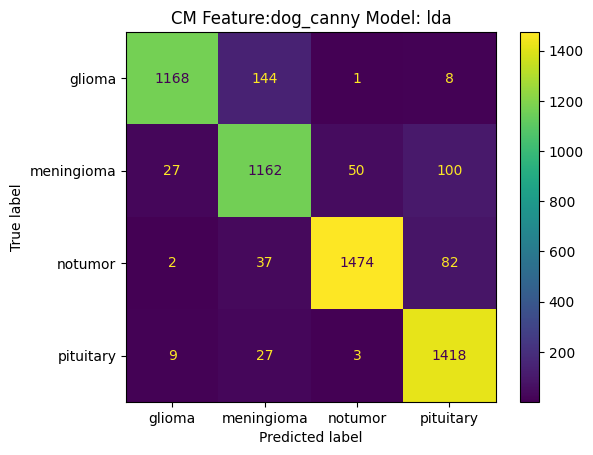

(5712, 4)


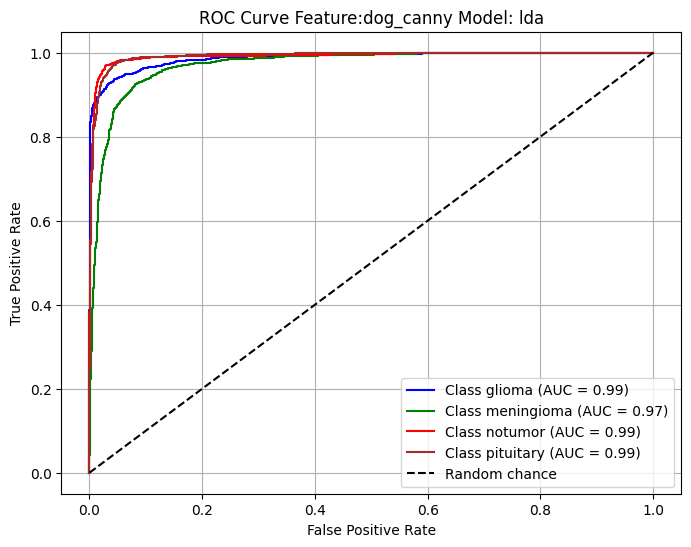

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 700, in fit
    raise NotImplementedError(

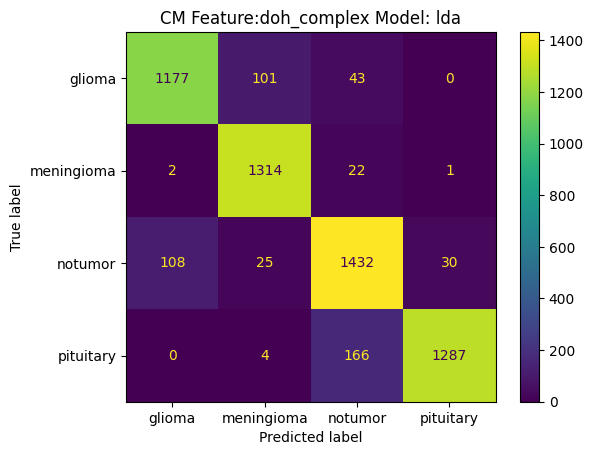

(5712, 4)


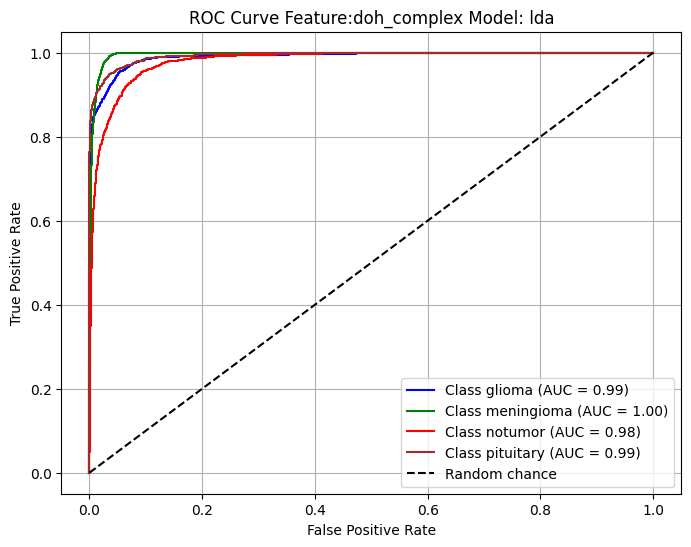

       feature model_type  accuracy_score  macro_precision  macro_recall  \
0          dog        lda        0.462185         0.443181      0.450829   
1          doh        lda        0.500525         0.509190      0.503459   
2        canny        lda        0.931197         0.930709      0.928070   
3      complex        lda        0.903711         0.906595      0.905578   
4      dog_doh        lda        0.619223         0.621747      0.616576   
5    dog_canny        lda        0.914216         0.915792      0.912340   
6  doh_complex        lda        0.912115         0.915519      0.913362   

   macro_f1  micro_precision  micro_recall  micro_f1  training_time  
0  0.429619         0.462185      0.462185  0.462185       0.196070  
1  0.504505         0.500525      0.500525  0.500525       0.257800  
2  0.928937         0.931197      0.931197  0.931197      24.539708  
3  0.904987         0.903711      0.903711  0.903711      12.673161  
4  0.614616         0.619223      0.61922

In [18]:
lda_models = {}
for feature in features.keys():
    lda_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='lda', feature=feature)
    lda_models[feature] = lda_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [19]:
lda_models

{'dog': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'doh': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'canny': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'complex': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'dog_doh': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'dog_canny': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),
 'doh_complex': LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')}

In [20]:
save_models(lda_models, 'lda_model')

saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=dog to path=lda_model_dog.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=doh to path=lda_model_doh.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=canny to path=lda_model_canny.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=complex to path=lda_model_complex.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=dog_doh to path=lda_model_dog_doh.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=dog_canny to path=lda_model_dog_canny.joblib
saved model=LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr') for feature=doh_complex to path=lda_model_doh_complex.joblib


#### Quadratic Discriminant Analysis

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.1s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.6s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END ......................................reg_param=1.0; total time=   0.0s
[CV] END ......................................re

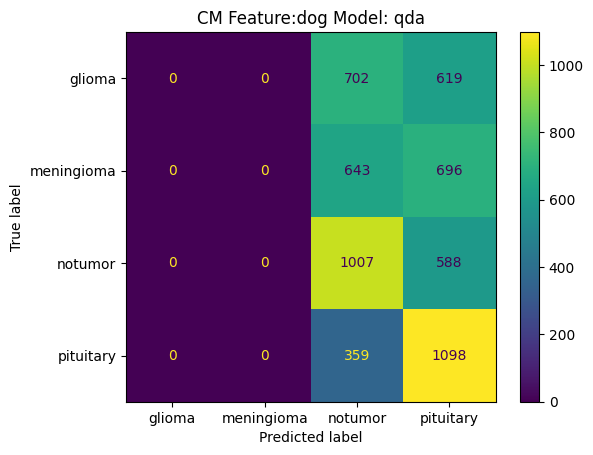

(5712, 4)


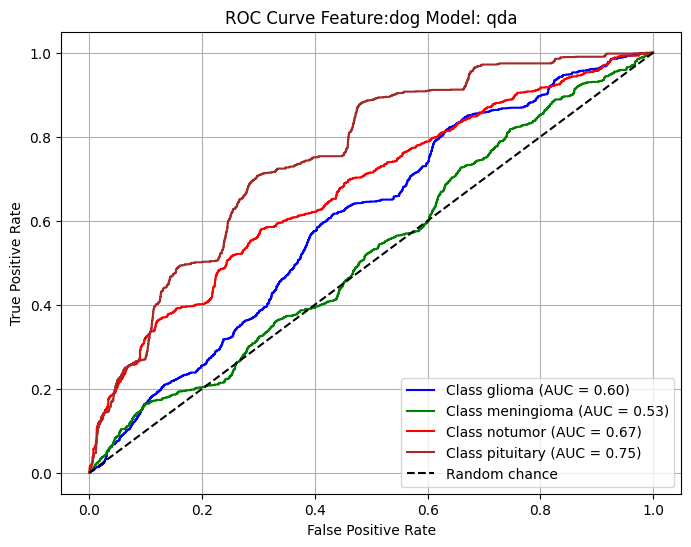

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END ......................................reg_param=1.0; total time=   0.0s
[CV] END ......................................re

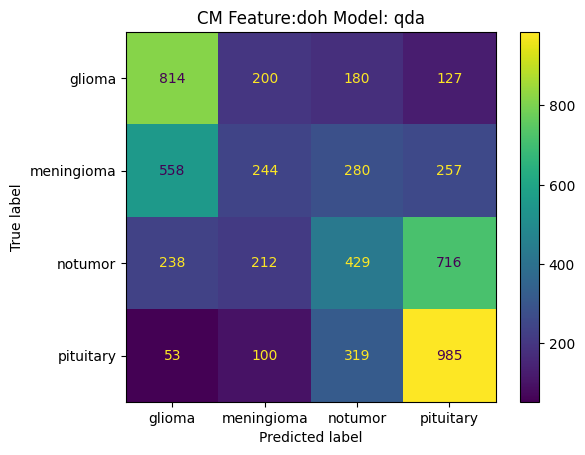

(5712, 4)


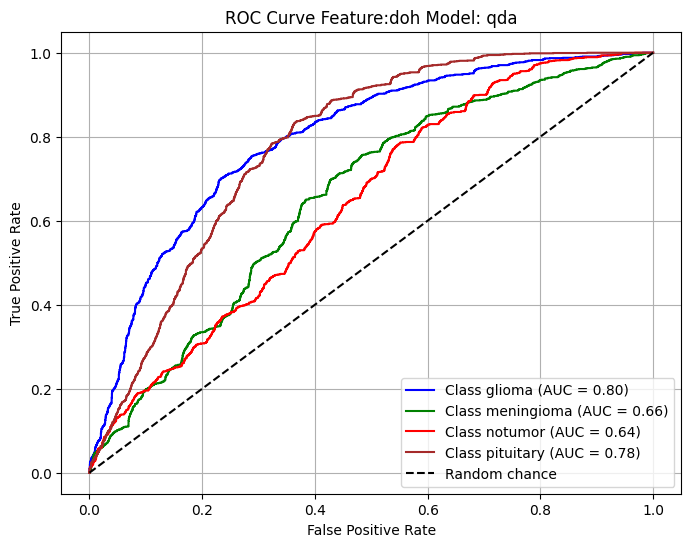

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   4.1s
[CV] END ......................................reg_param=0.5; total time=   4.3s
[CV] END ......................................reg_param=0.5; total time=   7.7s
[CV] END ......................................reg_param=0.5; total time=   4.1s
[CV] END ......................................reg_param=0.5; total time=   4.3s
[CV] END .....................................reg_param=0.75; total time=   7.6s
[CV] END .....................................reg_param=0.75; total time=   4.1s
[CV] END .....................................reg_param=0.75; total time=   7.6s
[CV] END .....................................reg_param=0.75; total time=   4.3s
[CV] END .....................................reg_param=0.75; total time=   4.1s
[CV] END ......................................reg_param=1.0; total time=   7.9s
[CV] END ......................................re

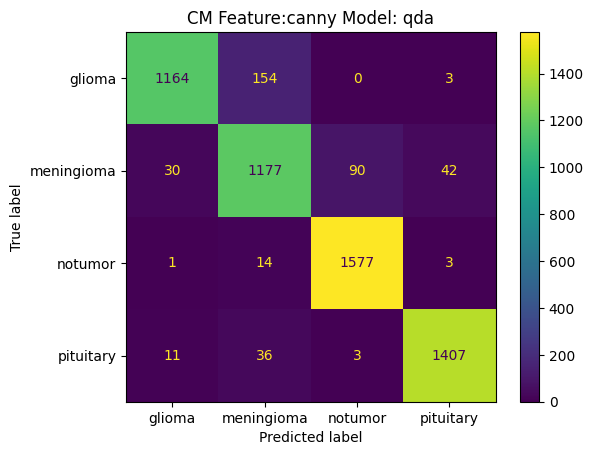

(5712, 4)


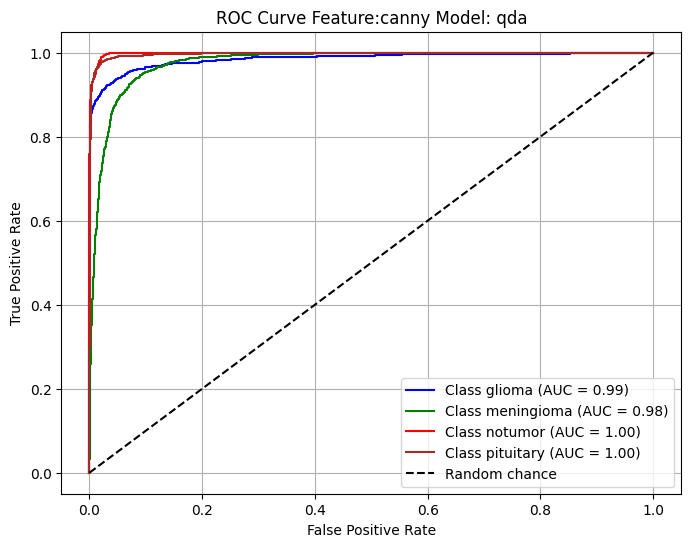

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   2.5s
[CV] END ......................................reg_param=0.5; total time=   2.5s
[CV] END ......................................reg_param=0.5; total time=   3.8s
[CV] END ......................................reg_param=0.5; total time=   4.8s
[CV] END ......................................reg_param=0.5; total time=   2.5s
[CV] END .....................................reg_param=0.75; total time=   2.6s
[CV] END .....................................reg_param=0.75; total time=   2.6s
[CV] END .....................................reg_param=0.75; total time=   6.3s
[CV] END .....................................reg_param=0.75; total time=   2.5s
[CV] END .....................................reg_param=0.75; total time=   2.5s
[CV] END ......................................reg_param=1.0; total time=   2.5s
[CV] END ......................................re

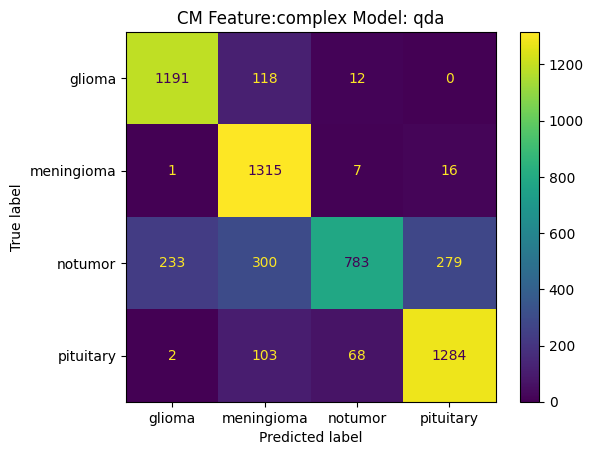

(5712, 4)


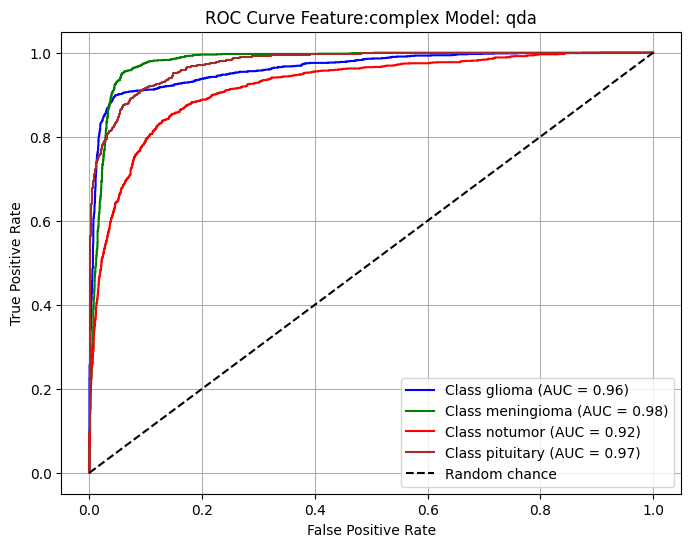

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END ......................................reg_param=0.5; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.1s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END .....................................reg_param=0.75; total time=   0.0s
[CV] END ......................................reg_param=1.0; total time=   0.4s
[CV] END ......................................re

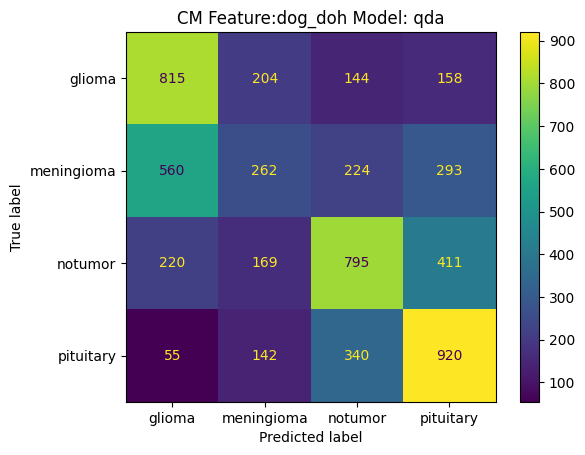

(5712, 4)


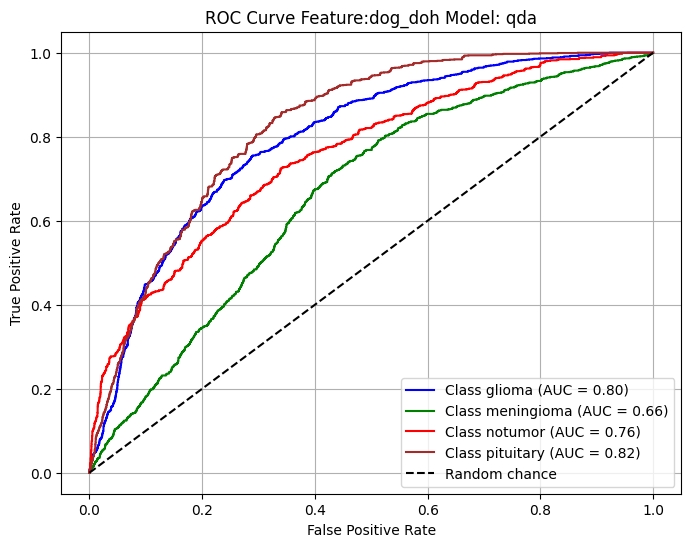

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   5.0s
[CV] END ......................................reg_param=0.5; total time=   4.2s
[CV] END ......................................reg_param=0.5; total time=   7.8s
[CV] END ......................................reg_param=0.5; total time=   4.2s
[CV] END ......................................reg_param=0.5; total time=   4.3s
[CV] END .....................................reg_param=0.75; total time=   8.0s
[CV] END .....................................reg_param=0.75; total time=   4.3s
[CV] END .....................................reg_param=0.75; total time=   5.2s
[CV] END .....................................reg_param=0.75; total time=   6.7s
[CV] END .....................................reg_param=0.75; total time=   4.3s
[CV] END ......................................reg_param=1.0; total time=   7.9s
[CV] END ......................................re

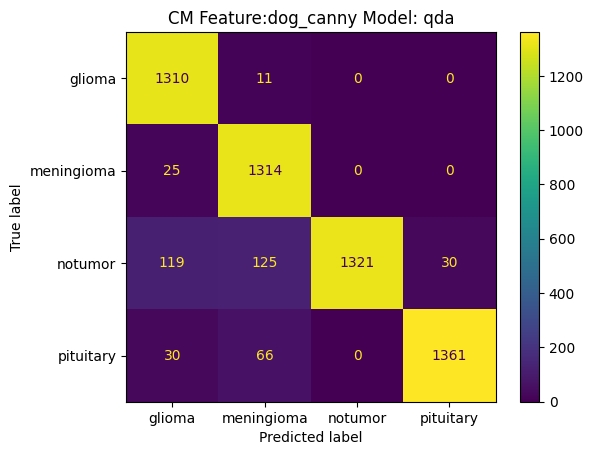

(5712, 4)


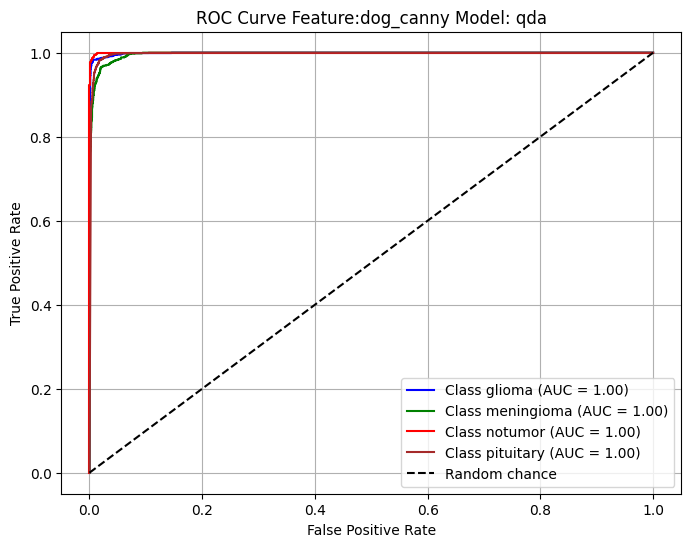

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ......................................reg_param=0.5; total time=   2.5s
[CV] END ......................................reg_param=0.5; total time=   2.5s
[CV] END ......................................reg_param=0.5; total time=   5.5s
[CV] END ......................................reg_param=0.5; total time=   3.2s
[CV] END ......................................reg_param=0.5; total time=   2.6s
[CV] END .....................................reg_param=0.75; total time=   2.5s
[CV] END .....................................reg_param=0.75; total time=   2.6s
[CV] END .....................................reg_param=0.75; total time=   6.2s
[CV] END .....................................reg_param=0.75; total time=   2.6s
[CV] END .....................................reg_param=0.75; total time=   2.5s
[CV] END ......................................reg_param=1.0; total time=   2.5s
[CV] END ......................................re

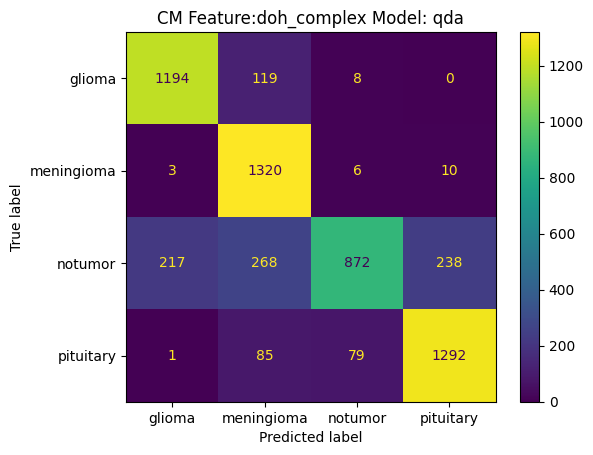

(5712, 4)


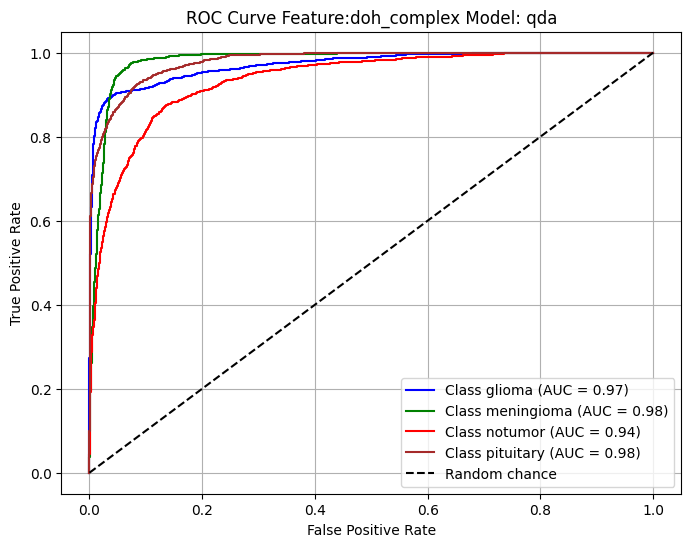

        feature model_type  accuracy_score  macro_precision  macro_recall  \
0           dog        lda        0.462185         0.443181      0.450829   
1           doh        lda        0.500525         0.509190      0.503459   
2         canny        lda        0.931197         0.930709      0.928070   
3       complex        lda        0.903711         0.906595      0.905578   
4       dog_doh        lda        0.619223         0.621747      0.616576   
5     dog_canny        lda        0.914216         0.915792      0.912340   
6   doh_complex        lda        0.912115         0.915519      0.913362   
7           dog        qda        0.368522         0.184332      0.346238   
8           doh        qda        0.432773         0.409946      0.435859   
9         canny        qda        0.932248         0.932194      0.928641   
10      complex        qda        0.800595         0.816005      0.813959   
11      dog_doh        qda        0.488796         0.469087      0.485623   

In [21]:
qda_models = {}
for feature in features.keys():
    qda_model, results = train_model(features[feature], y_train, classes=le.classes_, model_type='qda', feature=feature)
    qda_models[feature] = qda_model
    all_results.loc[len(all_results)] = results

print(all_results)

In [22]:
qda_models

{'dog': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.75)),
 'doh': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)),
 'canny': QuadraticDiscriminantAnalysis(reg_param=np.float64(1.0)),
 'complex': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)),
 'dog_doh': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)),
 'dog_canny': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)),
 'doh_complex': QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5))}

In [23]:
save_models(qda_models, 'qda_model')

saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.75)) for feature=dog to path=qda_model_dog.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)) for feature=doh to path=qda_model_doh.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(1.0)) for feature=canny to path=qda_model_canny.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)) for feature=complex to path=qda_model_complex.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)) for feature=dog_doh to path=qda_model_dog_doh.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)) for feature=dog_canny to path=qda_model_dog_canny.joblib
saved model=QuadraticDiscriminantAnalysis(reg_param=np.float64(0.5)) for feature=doh_complex to path=qda_model_doh_complex.joblib


### 6. Final Test Evaluation

In [24]:
# data_path_test = os.path.join(cwd,'data/Testing')
# destination_path = os.path.join(cwd,'standardized_data/Testing')
# X_test = []
# y_test = []

# for label in os.listdir(data_path_test):
#     for image in os.listdir(os.path.join(data_path_test,label)):
#         image_path = os.path.join(data_path_test,label,image)
#         load_image = preprocess_image(image_path)
#         save_path = os.path.join(destination_path,label,image)
#         plt.imsave(save_path, load_image, cmap='gray')
#         # flatten_image = load_image.flatten()
#         X_test.append(load_image)
#         y_test.append(label)


# # Convert to Numpy Array
# X_test = np.array(X_test)

# np.save('y_raw_test.npy',y_test)
# y_test = np.array(le.transform(y_test))
# np.save('y_test.npy',y_test)

# # Generate Feature Arrays
# X_test_doh_feature = get_features(X_test, feat_name='blob_doh')
# X_test_dog_feature = get_features(X_test, feat_name='blob_dog')
# X_test_canny_feature = get_features(X_test, feat_name='canny')

# np.save('X_test_doh.npy',X_test_doh_feature)
# np.save('X_test_dog.npy',X_test_dog_feature)
# np.save('X_test_canny.npy',X_test_canny_feature)

In [24]:
# load models
features_list = ['dog', 'doh', 'canny', 'complex']
logistic_models = load_models(features_list, 'logistic_model')
rf_models = load_models(features_list, 'rf_model')
features_list.extend(['dog_doh', 'dog_canny', 'doh_complex'])
lda_models = load_models(features_list, 'lda_model')
qda_models = load_models(features_list, 'qda_model')

loaded model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=dog from path=logistic_model_dog.joblib
loaded model=LogisticRegression(max_iter=1000) for feature=doh from path=logistic_model_doh.joblib
loaded model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=canny from path=logistic_model_canny.joblib
loaded model=LogisticRegression(max_iter=1000, solver='newton-cg') for feature=complex from path=logistic_model_complex.joblib
loaded model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=dog from path=rf_model_dog.joblib
loaded model=RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=110) for feature=doh from path=rf_model_doh.joblib
loaded model=RandomForestClassifier(max_depth=4) for feature=canny from path=rf_model_canny.joblib
loaded model=RandomForestClassifier(max_depth=4, n_estimators=110) for feature=complex from path=rf_model_complex.joblib
loaded model=LinearDiscriminantAnalysis(shrinkage='auto', solver=

In [25]:
data_path_test = os.path.join(cwd,'standardized_data/Testing')
X_test = []
y_test = []

for label in os.listdir(data_path_test):
    for image in os.listdir(os.path.join(data_path_test,label)):
        image_path = os.path.join(data_path_test,label,image)
        load_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        # flatten_image = load_image.flatten()
        X_test.append(load_image)
        y_test.append(label)


# Convert to Numpy Array
X_test = np.array(X_test)

In [26]:
y_test = np.load('y_test.npy')
X_test_doh_feature = np.load('X_test_doh.npy')
X_test_dog_feature = np.load('X_test_dog.npy')
X_test_canny_feature = np.load('X_test_canny.npy')
bundle = get_features(None, "complex", joblib_path="complex_feat_testing.joblib", return_bundle=True)
X_test_complex_feature, y_train_complex_feature = bundle.X, bundle.y
X_test_dog_doh_feature = np.concatenate((X_test_dog_feature, X_test_doh_feature), axis=1)
X_test_dog_canny_feature = np.concatenate((X_test_dog_feature, X_test_canny_feature), axis=1)
X_test_doh_complex_feature = np.concatenate((X_test_doh_feature, X_test_complex_feature), axis=1)
test_features = {'dog':X_test_dog_feature,
            'doh':X_test_doh_feature,
            'canny':X_test_canny_feature,
            'complex': X_test_complex_feature,
            'dog_doh': X_test_dog_doh_feature,
            'dog_canny': X_test_dog_canny_feature,
            'doh_complex': X_test_doh_complex_feature}

Loaded: X=(1311, 768), y=(1311,), paths=1311
Class counts: {'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}
Mismatches: 0
'glioma' indices sample: [0, 1, 2, 3, 4]


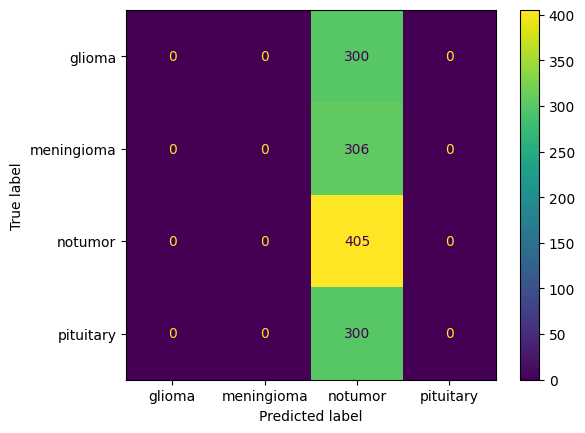

================== TESTING METRICS BASE MODEL ===================
Accuracy Score: 0.30892448512585813
Macro Precision: 0.07723112128146453
Macro Recall: 0.25
Macro F1: 0.11800699300699301
Micro Precision: 0.30892448512585813
Micro Recall: 0.30892448512585813
Micro F1: 0.30892448512585813


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# best model predictions
y_test_base_model = np.ones((y_test.shape)) * most_common_label

# Generate Confusion Matrix for Base Model
confusion_matrix = metrics.confusion_matrix(y_test, y_test_base_model)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = le.classes_)
cm_display.plot()
plt.show()

accuracy_score = metrics.accuracy_score(y_test, y_test_base_model)
macro_precision = metrics.precision_score(y_test,y_test_base_model,average ='macro')
macro_recall = metrics.recall_score(y_test,y_test_base_model,average='macro')
macro_f1 = metrics.f1_score(y_test,y_test_base_model,average='macro')
micro_precision = metrics.precision_score(y_test,y_test_base_model,average='micro')
micro_recall = metrics.recall_score(y_test,y_test_base_model,average='micro')
micro_f1 = metrics.f1_score(y_test,y_test_base_model,average='micro')

print("================== TESTING METRICS BASE MODEL ===================")
print("Accuracy Score: " + str(accuracy_score))
print("Macro Precision: " + str(macro_precision))
print("Macro Recall: " + str(macro_recall))
print("Macro F1: " + str(macro_f1))
print("Micro Precision: " + str(micro_precision))
print("Micro Recall: " + str(micro_recall))
print("Micro F1: " + str(micro_f1))

In [28]:
test_results = pd.DataFrame(columns = ['feature', 'model_type', 'accuracy_score', 'macro_precision', 'macro_recall', 'macro_f1',
                                      'micro_precision', 'micro_recall', 'micro_f1', 'inference_time'])

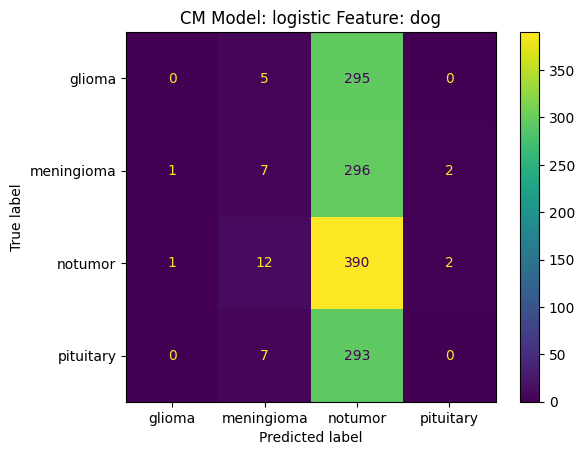

(1311, 4)


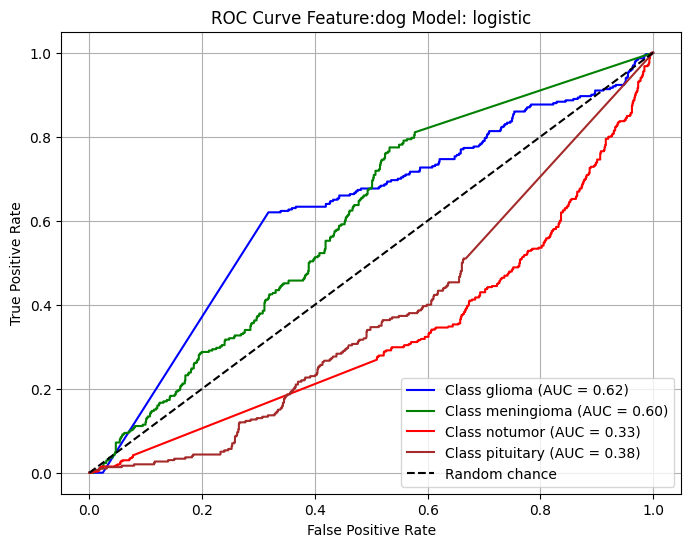

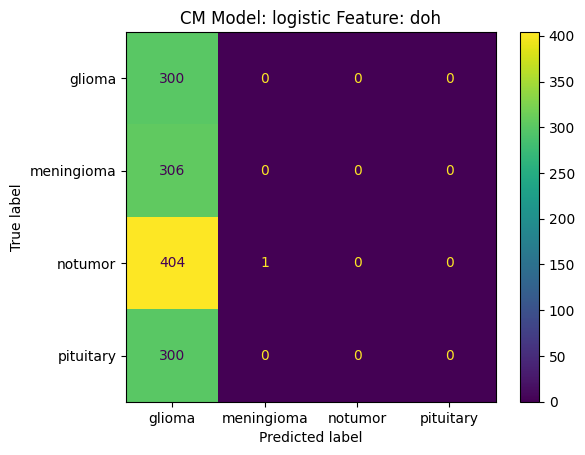

(1311, 4)


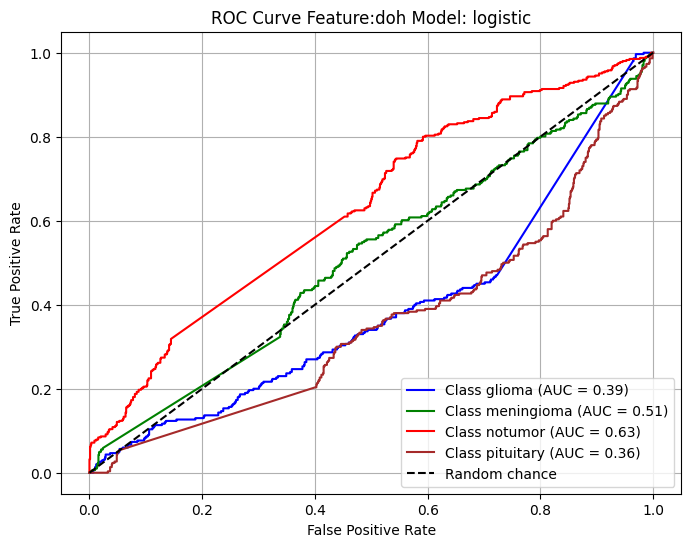

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


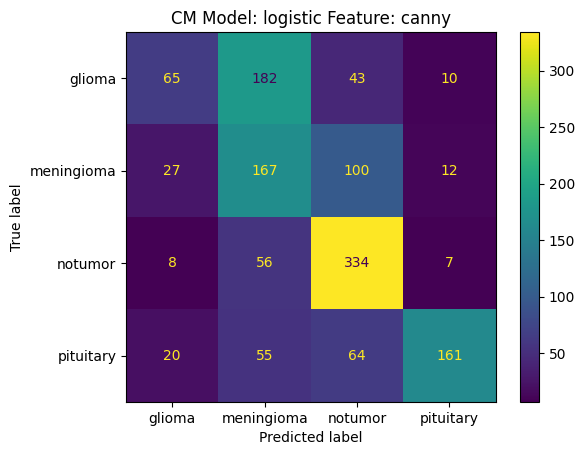

(1311, 4)


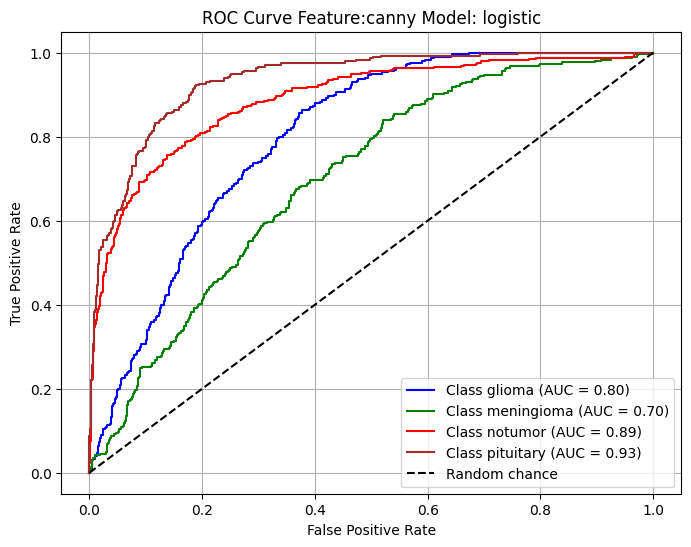

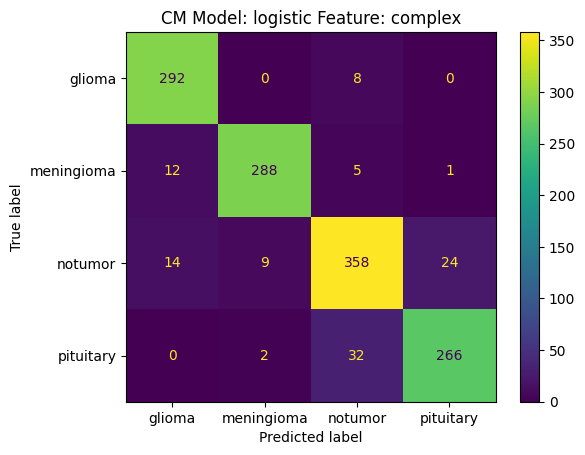

(1311, 4)


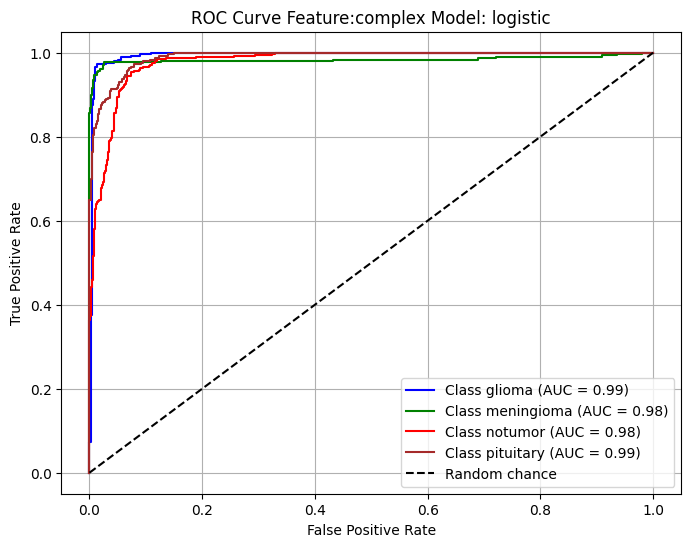

In [29]:
for feature in logistic_models.keys():
    results = test_model(logistic_models[feature], test_features[feature], y_test, classes=le.classes_, model_type='logistic', feature=feature)
    test_results.loc[len(test_results)] = results

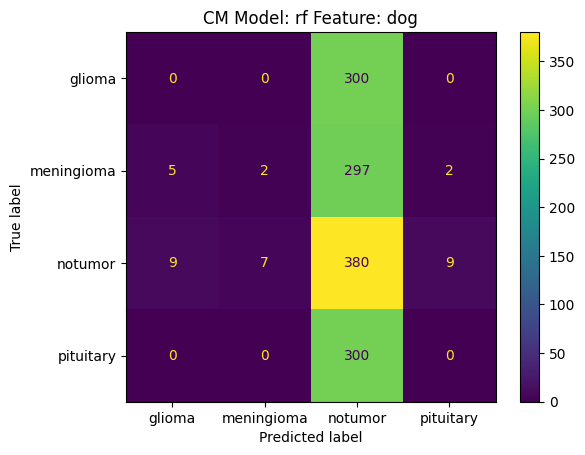

(1311, 4)


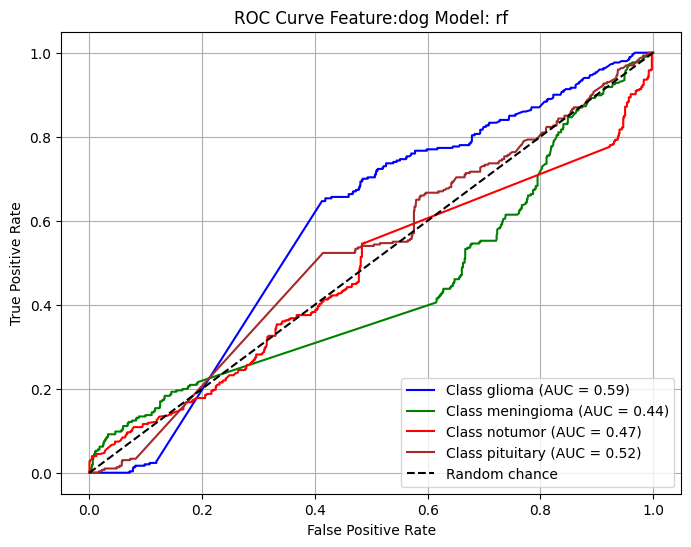

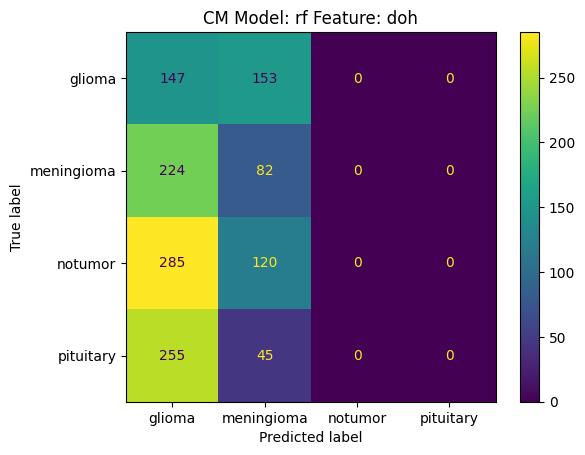

(1311, 4)


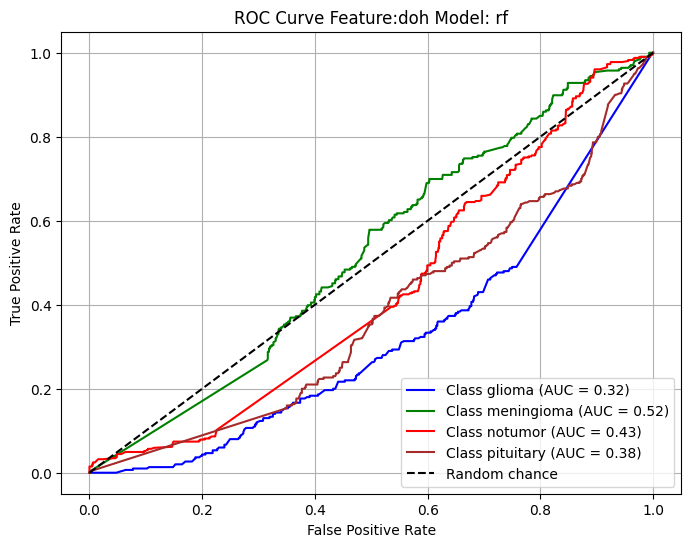

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


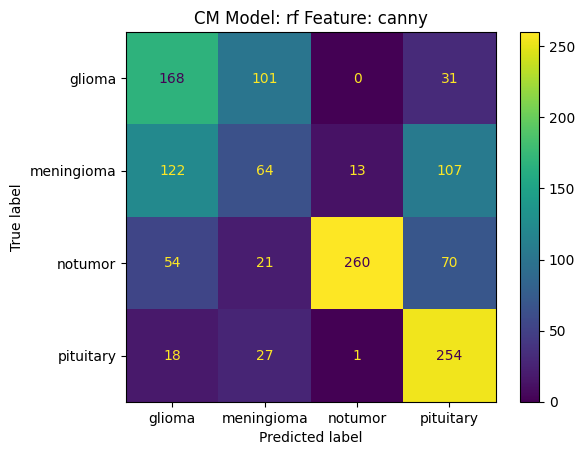

(1311, 4)


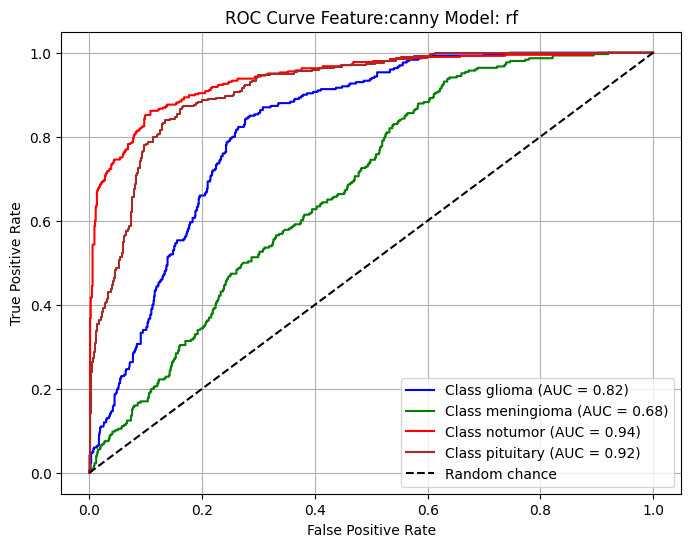

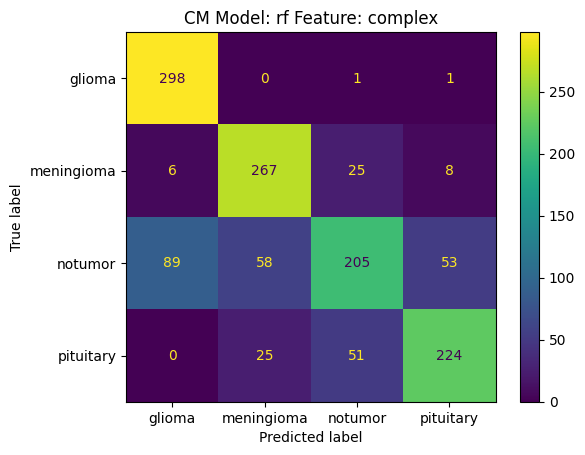

(1311, 4)


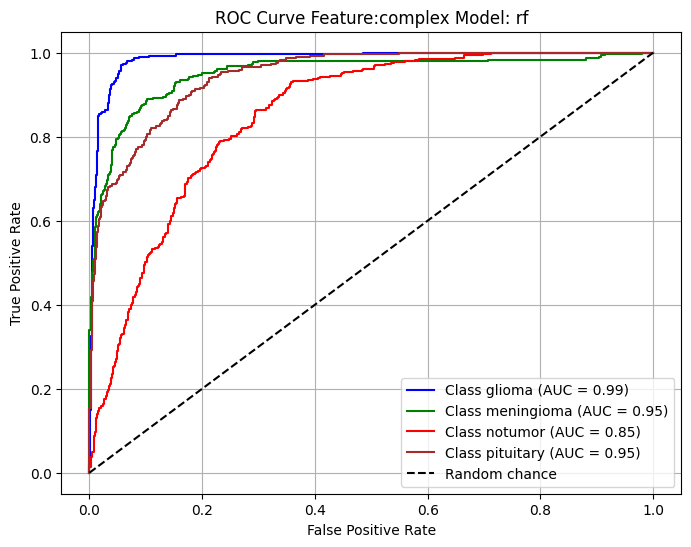

In [30]:
for feature in rf_models.keys():
    results = test_model(rf_models[feature], test_features[feature], y_test, classes=le.classes_, model_type='rf', feature=feature)
    test_results.loc[len(test_results)] = results

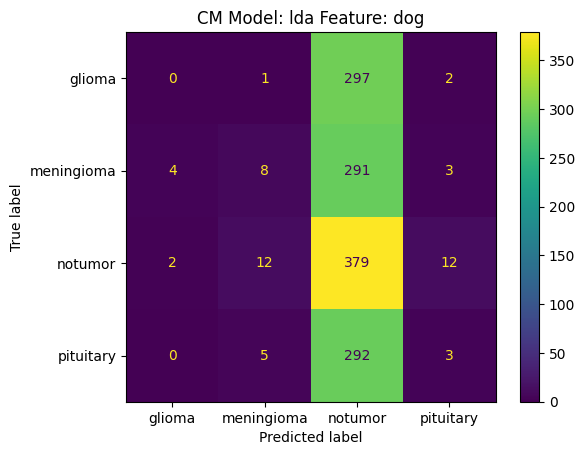

(1311, 4)


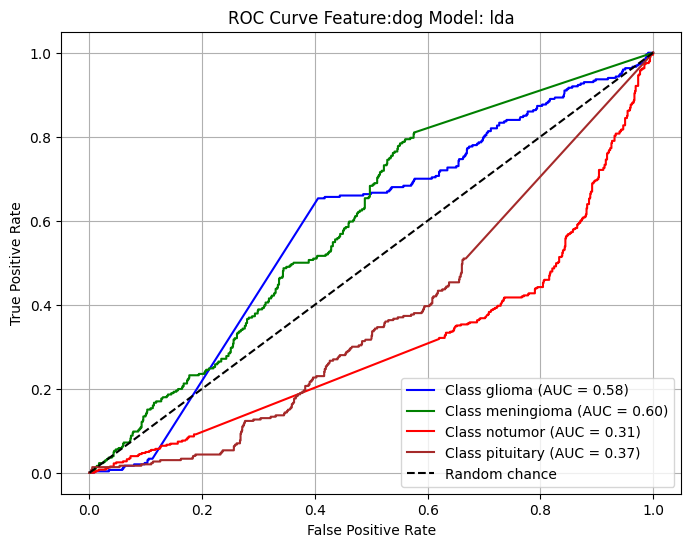

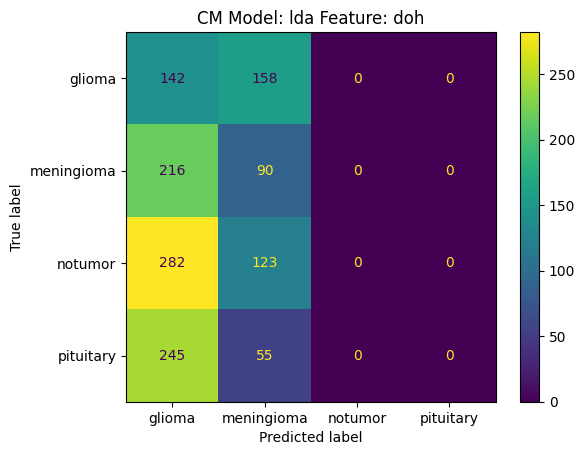

(1311, 4)


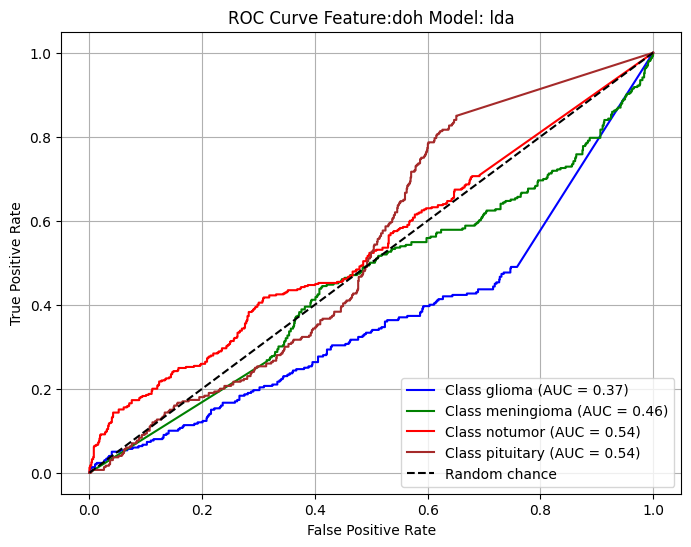

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


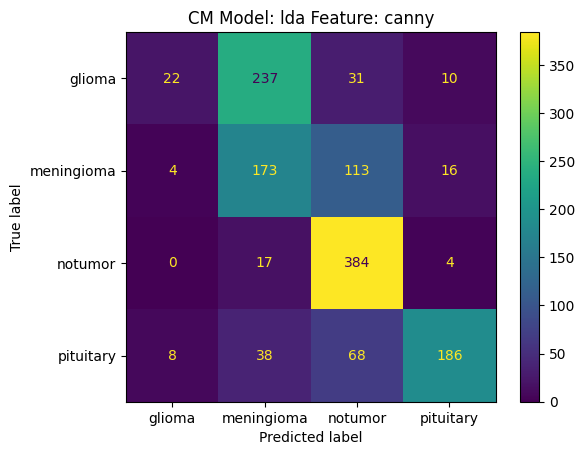

(1311, 4)


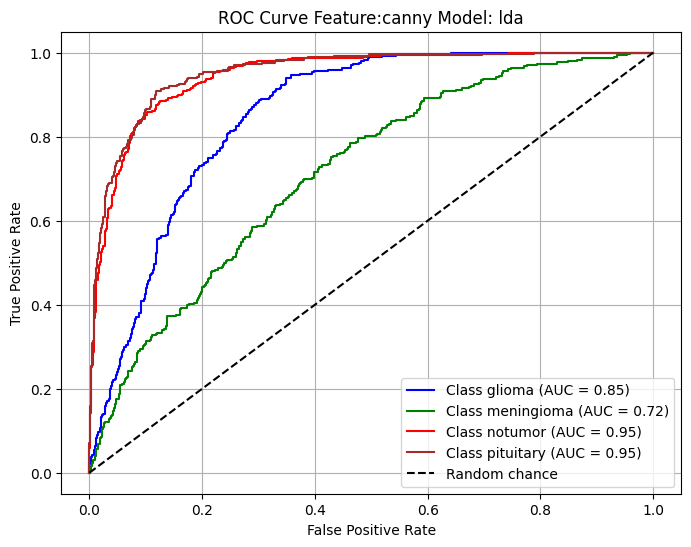

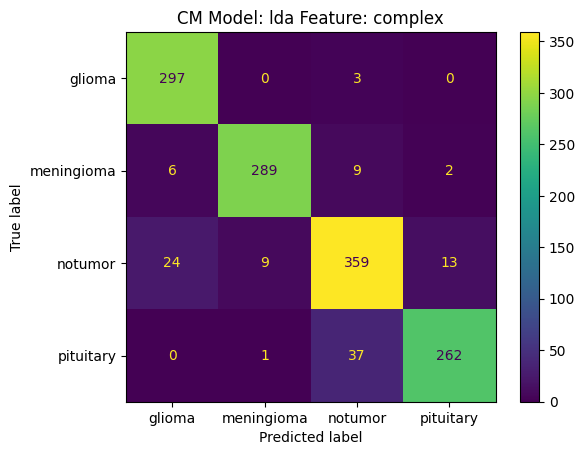

(1311, 4)


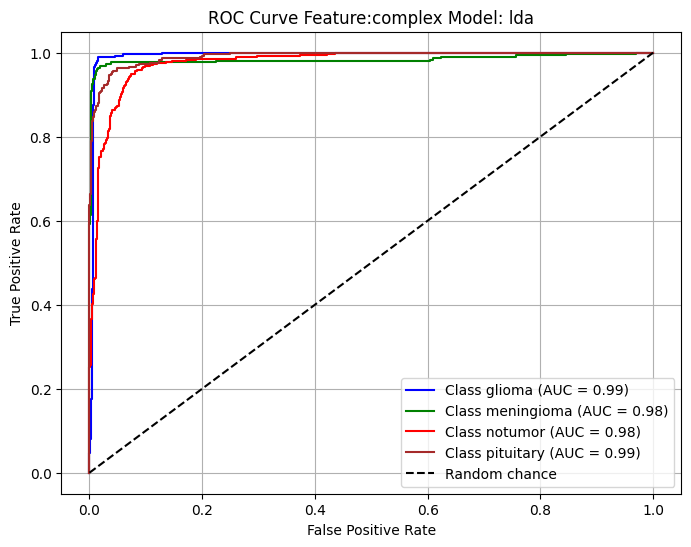

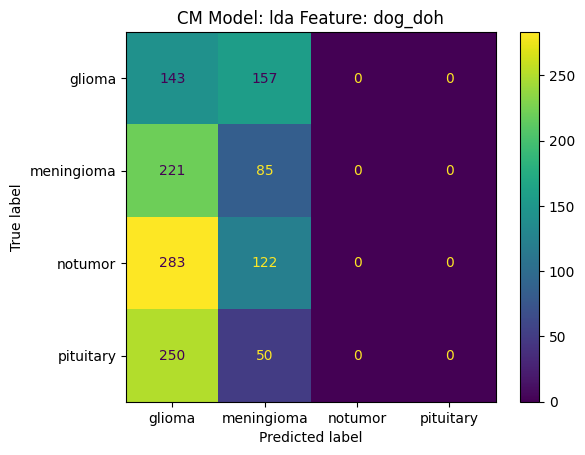

(1311, 4)


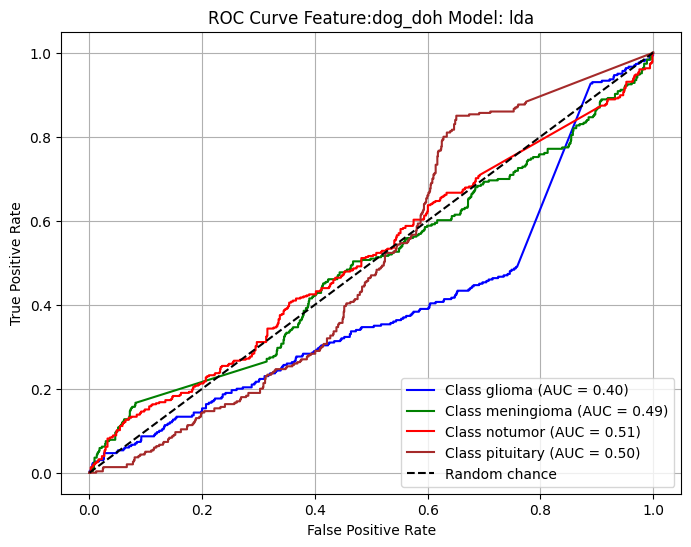

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


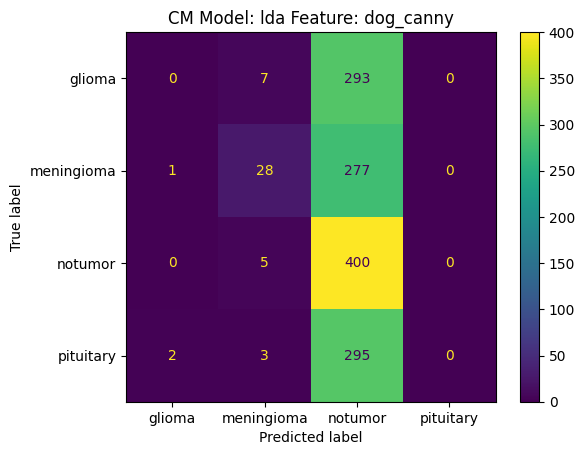

(1311, 4)


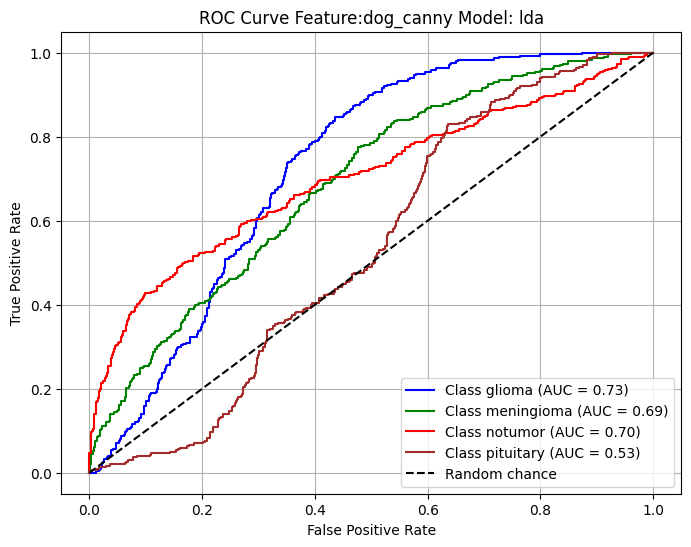

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


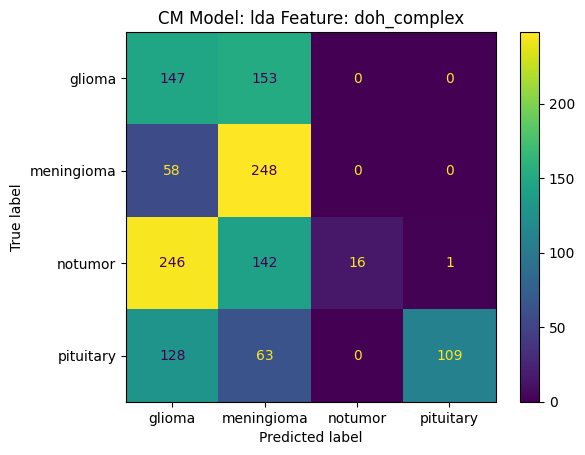

(1311, 4)


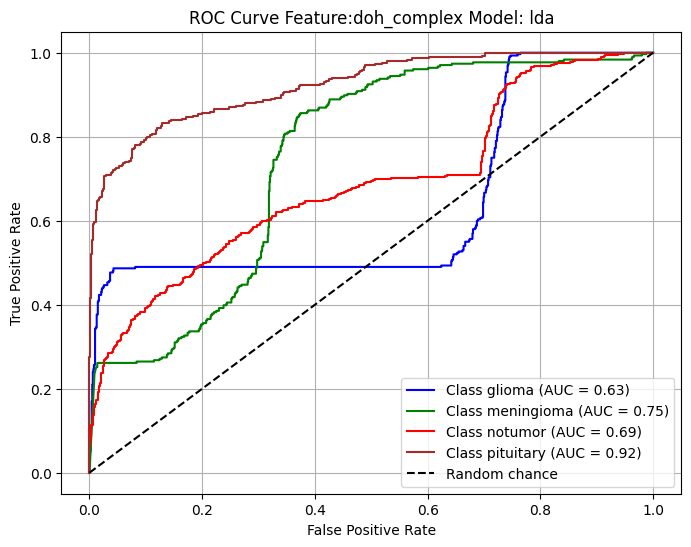

In [31]:
for feature in lda_models.keys():
    results = test_model(lda_models[feature], test_features[feature], y_test, classes=le.classes_, model_type='lda', feature=feature)
    test_results.loc[len(test_results)] = results

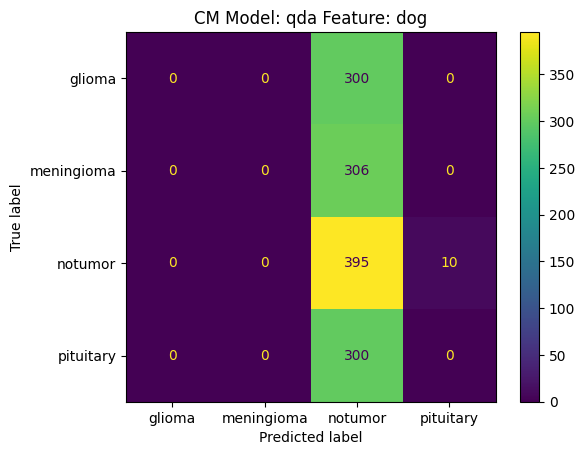

(1311, 4)


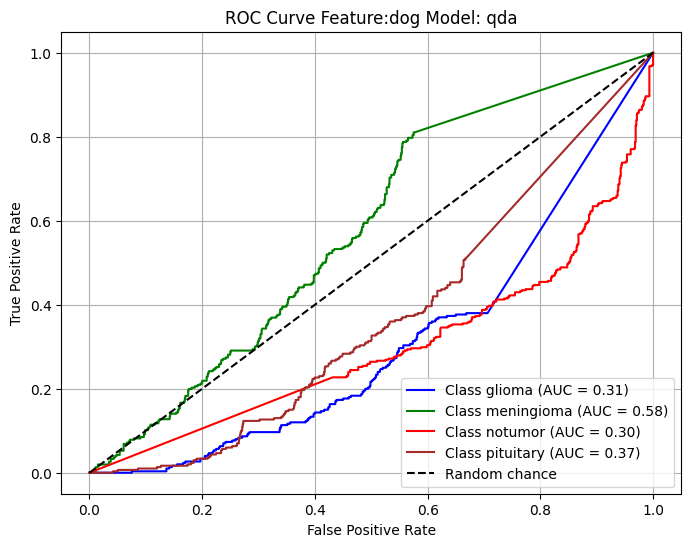

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


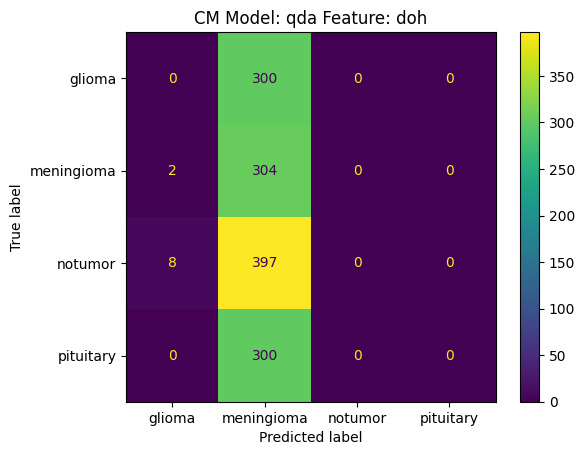

(1311, 4)


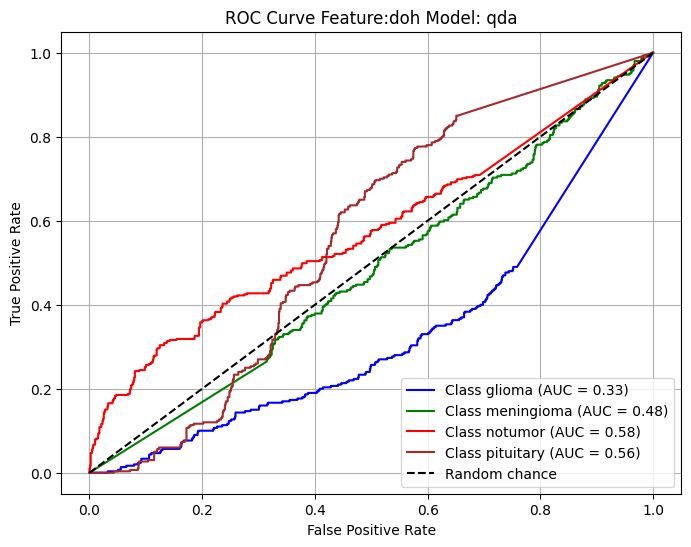

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


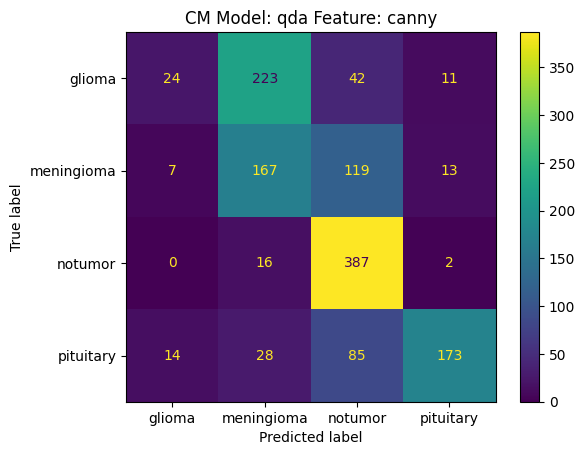

(1311, 4)


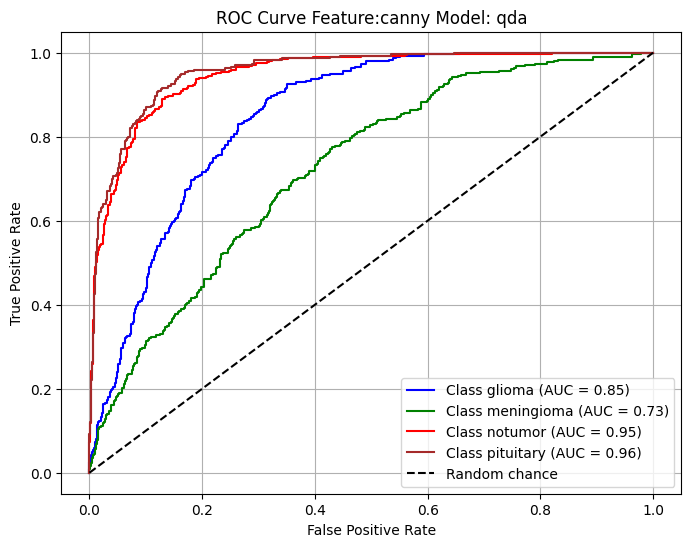

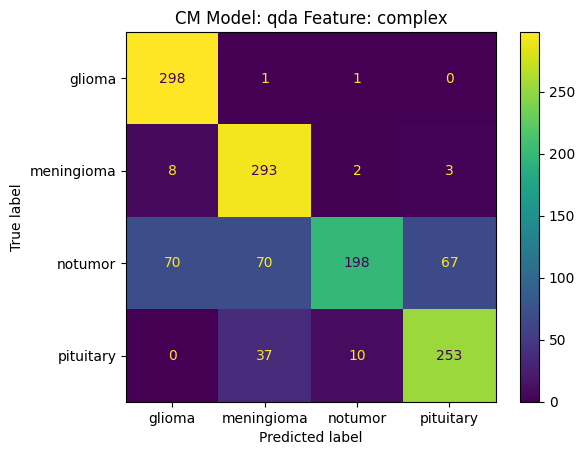

(1311, 4)


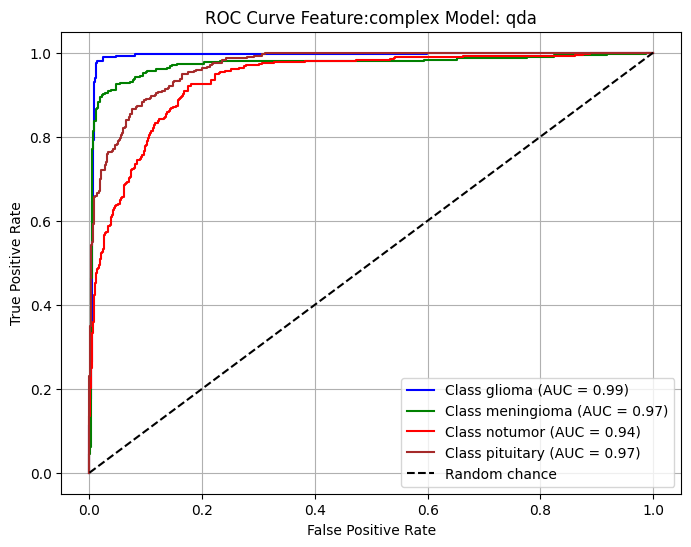

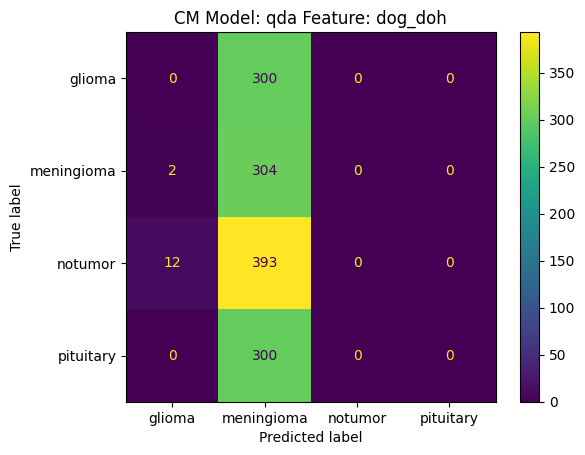

(1311, 4)


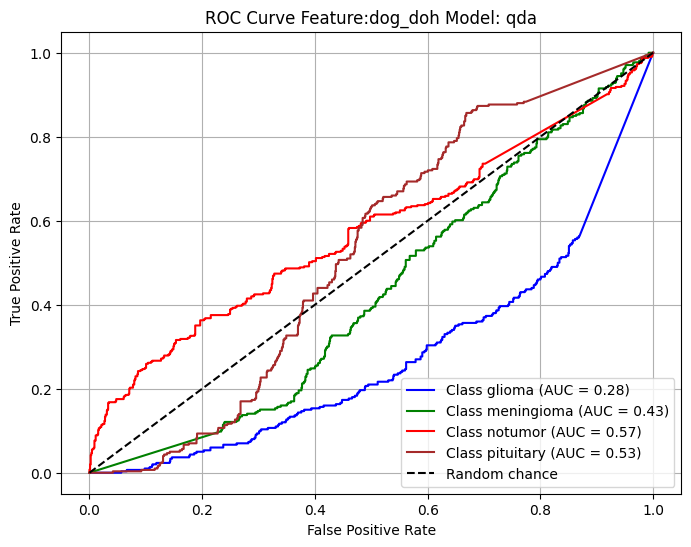

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


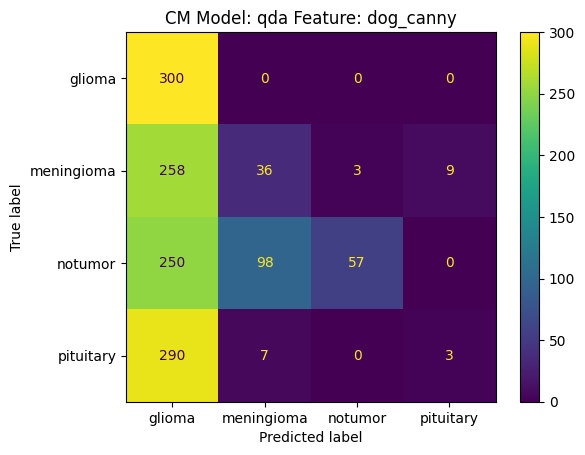

(1311, 4)


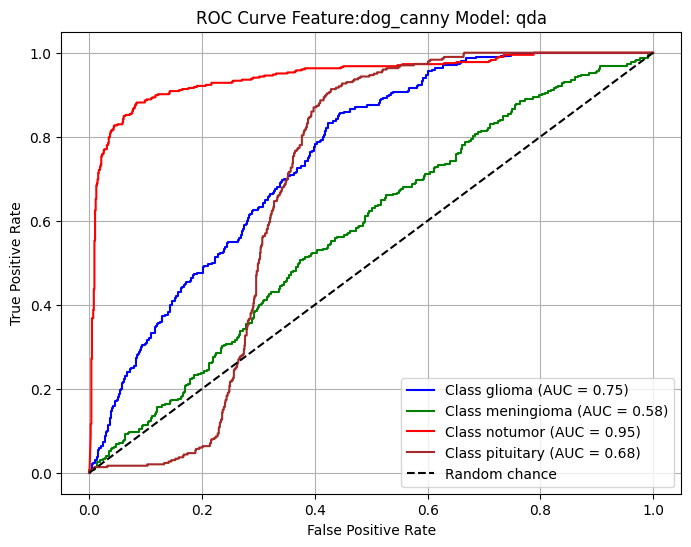

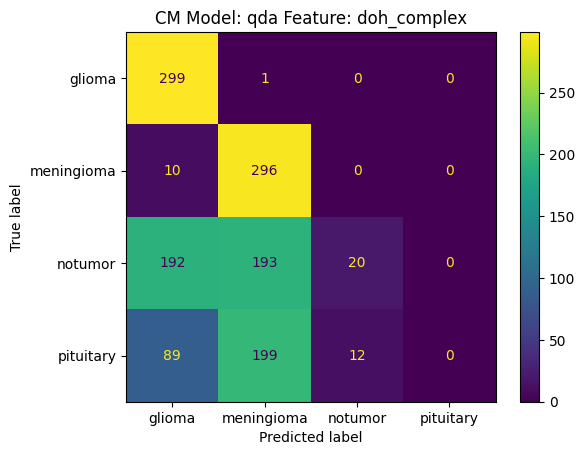

(1311, 4)


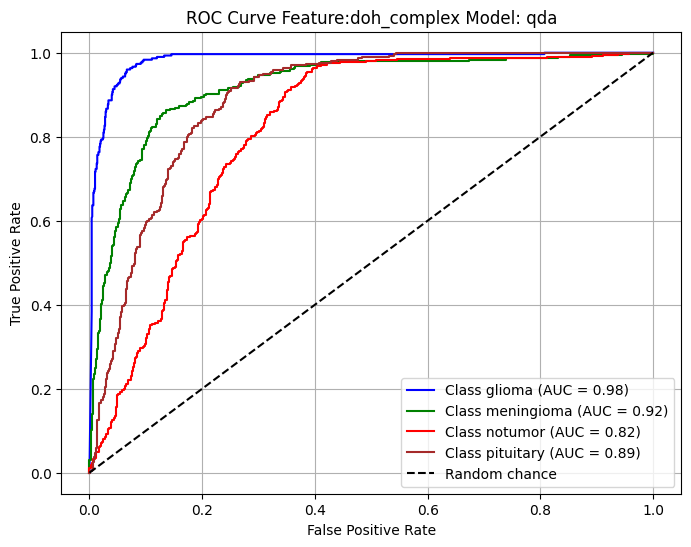

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
for feature in qda_models.keys():
    results = test_model(qda_models[feature], test_features[feature], y_test, classes=le.classes_, model_type='qda', feature=feature)
    test_results.loc[len(test_results)] = results

In [33]:
test_results

feature model_type  accuracy_score  macro_precision  macro_recall  \
0           dog   logistic        0.302822         0.132982      0.246460   
1           doh   logistic        0.228833         0.057252      0.250000   
2         canny   logistic        0.554539         0.592363      0.530944   
3       complex   logistic        0.918383         0.920969      0.921282   
4           dog         rf        0.291381         0.129949      0.236202   
5           doh         rf        0.174676         0.091590      0.189493   
6         canny         rf        0.569031         0.565812      0.564448   
7       complex         rf        0.758200         0.757824      0.779680   
8           dog        lda        0.297483         0.189681      0.242987   
9           doh        lda        0.176964         0.092930      0.191863   
10        canny        lda        0.583524         0.631127      0.551710   
11      complex        lda        0.920671         0.925141      0.923549   
12      dog_doh        lda        0.173913         0.091184      0.188611   
13    dog_canny        lda        0.326468         0.241842      0.269789   
14  doh_complex        lda        0.396644         0.663509      0.425824   
15          dog        qda        0.301297         0.075903      0.243827   
16          doh        qda        0.231884         0.058417      0.248366   
17        canny        qda        0.572845         0.599712      0.539493   
18      complex        qda        0.794813         0.811224      0.820768   
19      dog_doh        qda        0.231884         0.058597      0.248366   
20    dog_canny        qda        0.302059         0.432136      0.317097   
21  doh_complex        qda        0.469108         0.390347      0.503342   

    macro_f1  micro_precision  micro_recall  micro_f1  inference_time  
0   0.126526         0.302822      0.302822  0.302822        0.003172  
1   0.093168         0.228833      0.228833  0.228833        0.000889  
2   0.527207         0.554539      0.554539  0.554539        0.007963  
3   0.920839         0.918383      0.918383  0.918383        0.007643  
4   0.116135         0.291381      0.291381  0.291381        0.028100  
5   0.118767         0.174676      0.174676  0.174676        0.026680  
6   0.546670         0.569031      0.569031  0.569031        0.039156  
7   0.758839         0.758200      0.758200  0.758200        0.042484  
8   0.130618         0.297483      0.297483  0.297483        0.010543  
9   0.121391         0.176964      0.176964  0.176964        0.007195  
10  0.517167         0.583524      0.583524  0.583524        0.023410  
11  0.923509         0.920671      0.920671  0.920671        0.012012  
12  0.118760         0.173913      0.173913  0.173913        0.001698  
13  0.159875         0.326468      0.326468  0.326468        0.011057  
14  0.371512         0.396644      0.396644  0.396644        0.016072  
15  0.115768         0.301297      0.301297  0.301297        0.006247  
16  0.094586         0.231884      0.231884  0.231884        0.006577  
17  0.507383         0.572845      0.572845  0.572845        1.397299  
18  0.791392         0.794813      0.794813  0.794813        0.459062  
19  0.094822         0.231884      0.231884  0.231884        0.004407  
20  0.213663         0.302059      0.302059  0.302059        0.814703  
21  0.339605         0.469108      0.469108  0.469108        0.484834